# Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_curve, auc, roc_auc_score, plot_roc_curve, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [101]:
import pickle

# Absorbance data

In [2]:
file = pd.read_csv('Dataset/a_data.csv')
file['OverallPoF'].value_counts()

df = file.drop(['Gender','AgeM','ECV','TPP','SC','TympPoF','OAE1','OAE1.4','OAE2','OAE2.8','OAE4','OAEPoF','Ear.coded','OverallPoF'], axis = 1)

# 1 - Individual models for each feature/frequency

## 1.1 Original

In [3]:
#Freq with OverallPoF
acc_score = []
lr_score = [] 

for freq in df:
    X = df[freq]
    y = file['OverallPoF']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    X_train = X_train.to_numpy().reshape(-1,1)
    X_test = X_test.to_numpy().reshape(-1,1)
    
    #Ridge
    #model = LogisticRegression(penalty = 'l2',class_weight='balanced')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear',class_weight='balanced')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
    
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    lr_score.append([freq,acc_score])
    #print(classification_report(y_test, y_pred))
    
    #plot_roc_curve(model, X_test, y_test, name=freq)
    
    #ROC CURVES
    #y_predict_proba = model.predict_proba(X_test)
    #probabilities = np.array(y_predict_proba)[:,1]
    #fpr, tpr, thresholds = roc_curve(y_test, probabilities, pos_label=1)
    #roc_auc = auc(fpr, tpr)
    #logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    #print(roc_auc)
    
    #plt.title('Receiver Operating Characteristic ' + freq)
    #plt.plot(fpr,tpr)
    #plt.plot([0, 1], ls="--")
    #plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')

    
lr_score.sort(key=lambda x:x[1])
lr_score

[['f5187', 0.14583333333333334],
 ['f5039', 0.3958333333333333],
 ['f7336', 0.4166666666666667],
 ['f7550', 0.4375],
 ['f4896', 0.4583333333333333],
 ['f8000', 0.4583333333333333],
 ['f7772', 0.4791666666666667],
 ['f4756', 0.5416666666666666],
 ['f257', 0.5625],
 ['f3886', 0.5625],
 ['f4621', 0.5625],
 ['f226', 0.5833333333333334],
 ['f4000', 0.5833333333333334],
 ['f4237', 0.5833333333333334],
 ['f280', 0.6041666666666666],
 ['f343', 0.6041666666666666],
 ['f3563', 0.6041666666666666],
 ['f4117', 0.6041666666666666],
 ['f4362', 0.6041666666666666],
 ['f4489', 0.6041666666666666],
 ['f5495', 0.6041666666666666],
 ['f6168', 0.6041666666666666],
 ['f6349', 0.6041666666666666],
 ['f6535', 0.6041666666666666],
 ['f297', 0.625],
 ['f324', 0.625],
 ['f363', 0.625],
 ['f3084', 0.625],
 ['f3174', 0.625],
 ['f3267', 0.625],
 ['f3363', 0.625],
 ['f3462', 0.625],
 ['f3668', 0.625],
 ['f3775', 0.625],
 ['f5339', 0.625],
 ['f5656', 0.625],
 ['f5993', 0.625],
 ['f6727', 0.625],
 ['f385', 0.64583333

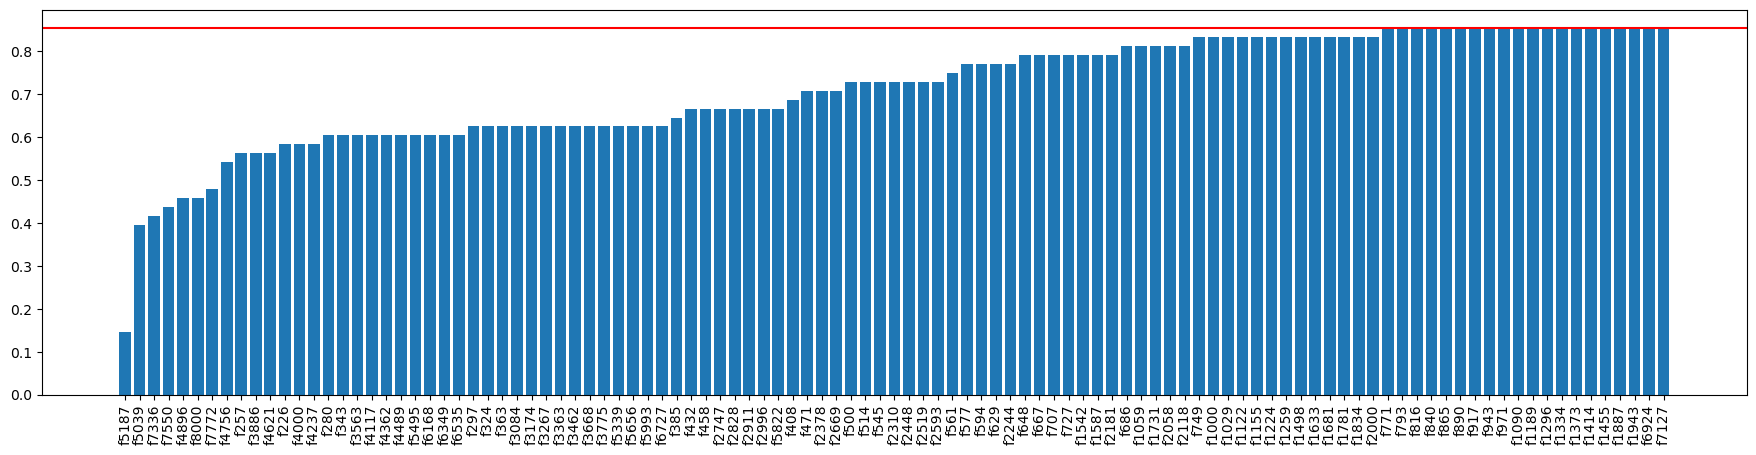

In [4]:
freq1 = [x for x,y in lr_score]
acc1 = [y for x,y in lr_score]

plt.figure(figsize=(22,5))
plt.bar(freq1,acc1)
plt.axhline(y=0.8541666666666666, color = 'r')
plt.xticks(rotation=90)
plt.show()

### 1.1.1 Model based on top individuals

0.8437062937062938
Feature: f771, Score: -0.35823
Feature: f793, Score: 0.00000
Feature: f816, Score: 0.00000
Feature: f840, Score: 0.00000
Feature: f865, Score: 0.00000
Feature: f890, Score: 0.00000
Feature: f943, Score: 0.00000
Feature: f971, Score: 0.00000
Feature: f1000, Score: 0.00000
Feature: f1090, Score: -0.17258
Feature: f1189, Score: 0.00000
Feature: f1296, Score: 0.00000
Feature: f1334, Score: -0.22501
Feature: f1373, Score: -0.08230
Feature: f1414, Score: -0.20849
Feature: f1455, Score: -0.02306
Feature: f1887, Score: -0.66099
Feature: f1943, Score: -0.07614


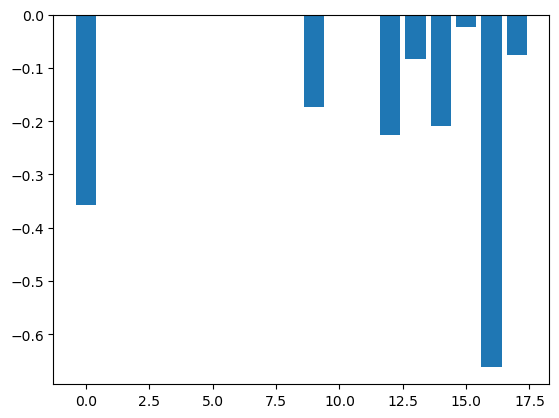

In [5]:
top1_score = []
#top1 = file[['f865', 'f890', 'f917', 'f943']]
top1 = file[['f771','f793','f816','f840','f865','f890','f943','f971','f1000','f1090','f1189','f1296','f1334','f1373','f1414','f1455','f1887','f1943']]
#top1 = file[['f749','f917','f1029','f1122','f1155','f1224','f1259','f1498','f1633','f1681','f1781','f1834','f2000','f771','f793','f816','f840','f865','f890','f943','f971','f1000','f1090','f1189','f1296','f1334','f1373','f1414','f1455','f1887','f1943','f6924','f7127']]
y = file['OverallPoF']

X_train, X_test, y_train, y_test = train_test_split(top1, y, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, # X
        y_train, # y
        test_size = 0.2, 
        random_state = 12
)
#print(X_test)

OGXtrain = X_train
OGytrain = y_train
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

model11 = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
model11.fit(X_train, y_train)

y_pred = model11.predict(X_train)
acc_score = accuracy_score(y_train, y_pred)

print(recall_score(y_train, y_pred, average='macro'))

#print(classification_report(y_val, y_pred))

#Negative scores predict class 0
importance = model11.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (top1.columns[i],v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

#plot_confusion_matrix(model11, X_test, y_test)
#plt.show()


## 1.2 SMOTE

In [6]:
import warnings
warnings.filterwarnings("ignore")

X_train = pd.read_csv('Dataset/SMOTE/X_train.csv')
X_test = pd.read_csv('Dataset/SMOTE/X_test.csv')
y_train = pd.read_csv('Dataset/SMOTE/y_train.csv')
y_test = pd.read_csv('Dataset/SMOTE/y_test.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')

smote_acc_score = []
smote_lr_score = [] 

for freq in X_train:
    X = X_train[freq]
    y = y_train
    
    X = X.values
    X = X.reshape(-1,1)
    
    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)

    model.fit(X, y.values.ravel())
    
    score = model.score(X_test[[freq]], y_test)
    y_pred = model.predict(X_test[[freq]])
    smote_acc_score = accuracy_score(y_test, y_pred)
    smote_lr_score.append([freq,smote_acc_score])
    
    
smote_lr_score.sort(key=lambda x:x[1])
smote_lr_score

[['fa7550', 0.14583333333333334],
 ['fa4621', 0.4375],
 ['fa8000', 0.4375],
 ['fa4756', 0.5416666666666666],
 ['fa4237', 0.5625],
 ['fa4362', 0.5625],
 ['fa6727', 0.5625],
 ['fa226', 0.5833333333333334],
 ['fa3174', 0.5833333333333334],
 ['fa3267', 0.5833333333333334],
 ['fa3886', 0.5833333333333334],
 ['fa4000', 0.5833333333333334],
 ['fa4117', 0.5833333333333334],
 ['fa4489', 0.5833333333333334],
 ['fa4896', 0.5833333333333334],
 ['fa6349', 0.5833333333333334],
 ['fa7336', 0.5833333333333334],
 ['fa3084', 0.6041666666666666],
 ['fa3363', 0.6041666666666666],
 ['fa3775', 0.6041666666666666],
 ['fa6535', 0.6041666666666666],
 ['fa6924', 0.6041666666666666],
 ['fa7127', 0.6041666666666666],
 ['fa257', 0.625],
 ['fa2996', 0.625],
 ['fa3462', 0.625],
 ['fa3563', 0.625],
 ['fa3668', 0.625],
 ['fa5039', 0.625],
 ['fa5495', 0.625],
 ['fa5822', 0.625],
 ['fa6168', 0.625],
 ['fa324', 0.6458333333333334],
 ['fa343', 0.6458333333333334],
 ['fa2669', 0.6458333333333334],
 ['fa5656', 0.64583333333

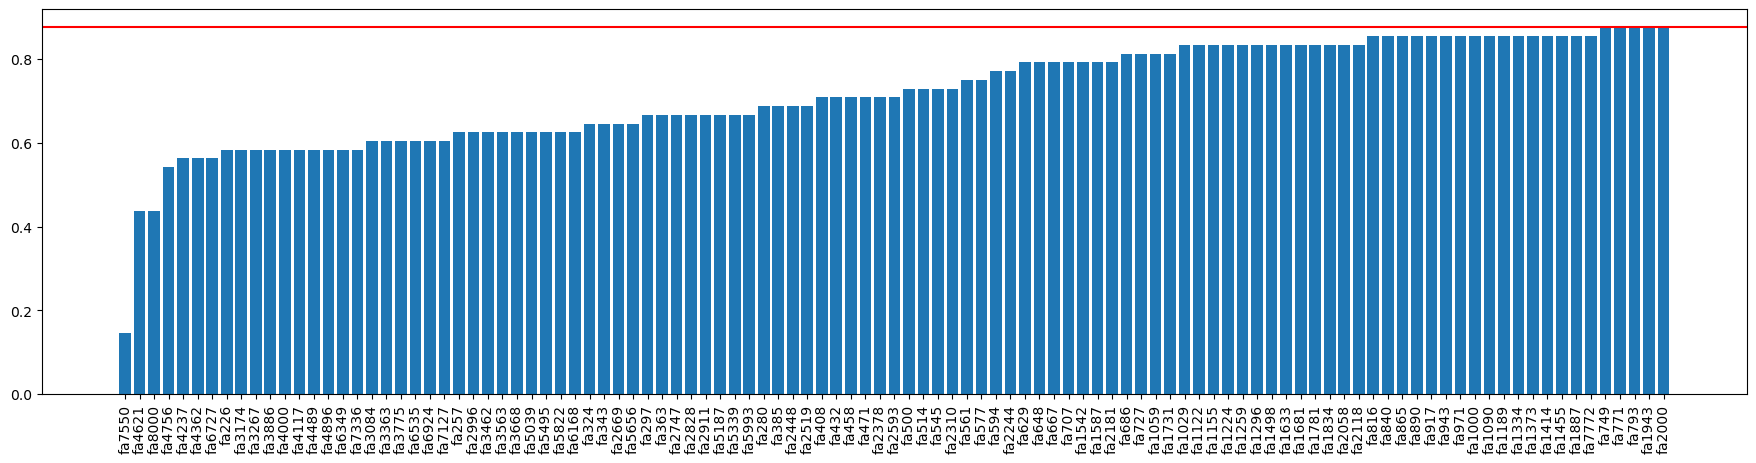

In [7]:
freqsm = [x for x,y in smote_lr_score]
accsm = [y for x,y in smote_lr_score]

plt.figure(figsize=(22,5))
plt.bar(freqsm,accsm)
plt.axhline(y=0.875, color = 'r')
plt.xticks(rotation=90)
plt.show()

### 1.2.1 Model Based on Top Individuals SMOTE

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.87      0.81      0.84       130

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260

0.8423076923076923
Feature: fa749, Score: -0.42843
Feature: fa771, Score: -0.46398
Feature: fa793, Score: -0.27968
Feature: fa865, Score: -0.28085
Feature: fa1943, Score: -1.47410
Feature: fa2000, Score: -1.17585
Feature: fa816, Score: -0.17684
Feature: fa840, Score: -0.22824
Feature: fa890, Score: -0.31942
Feature: fa917, Score: -0.32659
Feature: fa943, Score: -0.41421
Feature: fa971, Score: -0.55975
Feature: fa1000, Score: -0.77687
Feature: fa1090, Score: -1.39240
Feature: fa1189, Score: -0.89692
Feature: fa1334, Score: -0.95834
Feature: fa1373, Score: -0.78306
Feature: fa1414, Score: -0.68801
Feature: fa1455, Score: -0.43383
Feature: fa1887, Score: -1.48600


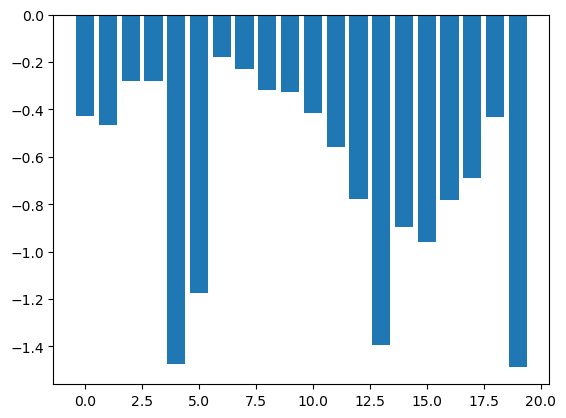

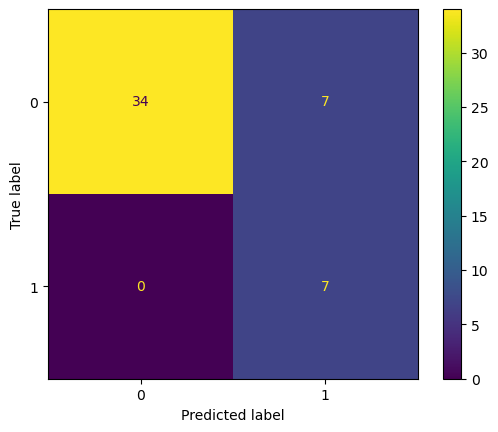

In [8]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')


top2_score = []
top2 = X_train[['fa749','fa771','fa793','fa865','fa1943','fa2000','fa816','fa840','fa890','fa917','fa943','fa971','fa1000','fa1090','fa1189','fa1334','fa1373','fa1414','fa1455','fa1887']]

X_test = X_test[(X_test.columns) & (top2.columns)]
X_val = X_val[(X_val.columns) & (top2.columns)]

model12 = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
model12.fit(top2, y_train)


y_pred = model12.predict(top2)
acc_score = accuracy_score(y_train, y_pred)
#print(acc_score)
print(classification_report(y_train, y_pred))

print(recall_score(y_train, y_pred, average='macro'))

importance = model12.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (top2.columns[i],v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

plot_confusion_matrix(model12, X_test, y_test)
plt.show()

## 1.3 SMOTETomek

In [9]:
X_train = pd.read_csv('Dataset/SMOTETomek/X_train.csv')
X_test = pd.read_csv('Dataset/SMOTETomek/X_test.csv')
y_train = pd.read_csv('Dataset/SMOTETomek/y_train.csv')
y_test = pd.read_csv('Dataset/SMOTETomek/y_test.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')

smotetom_acc_score = []
smotetom_lr_score = [] 

for freq in X_train:
    X = X_train[freq]
    y = y_train
    
    X = X.values
    X = X.reshape(-1,1)
    
    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)

    model.fit(X, y.values.ravel())
    
    score = model.score(X_test[[freq]], y_test)
    y_pred = model.predict(X_test[[freq]])
    smotetom_acc_score = accuracy_score(y_test, y_pred)
    smotetom_lr_score.append([freq,smotetom_acc_score])
    
    
smotetom_lr_score.sort(key=lambda x:x[1])
smotetom_lr_score


[['fa7550', 0.4375],
 ['fa7772', 0.4583333333333333],
 ['fa8000', 0.4583333333333333],
 ['fa4756', 0.5],
 ['fa226', 0.5625],
 ['fa4621', 0.5625],
 ['fa3174', 0.5833333333333334],
 ['fa3775', 0.5833333333333334],
 ['fa3886', 0.5833333333333334],
 ['fa4117', 0.5833333333333334],
 ['fa4237', 0.5833333333333334],
 ['fa4489', 0.5833333333333334],
 ['fa4896', 0.5833333333333334],
 ['fa6168', 0.5833333333333334],
 ['fa6727', 0.5833333333333334],
 ['fa7127', 0.5833333333333334],
 ['fa3267', 0.6041666666666666],
 ['fa3363', 0.6041666666666666],
 ['fa3668', 0.6041666666666666],
 ['fa4000', 0.6041666666666666],
 ['fa4362', 0.6041666666666666],
 ['fa5656', 0.6041666666666666],
 ['fa6349', 0.6041666666666666],
 ['fa6535', 0.6041666666666666],
 ['fa257', 0.625],
 ['fa3084', 0.625],
 ['fa3462', 0.625],
 ['fa3563', 0.625],
 ['fa5039', 0.625],
 ['fa5339', 0.625],
 ['fa5495', 0.625],
 ['fa5993', 0.625],
 ['fa6924', 0.625],
 ['fa297', 0.6458333333333334],
 ['fa324', 0.6458333333333334],
 ['fa343', 0.6458

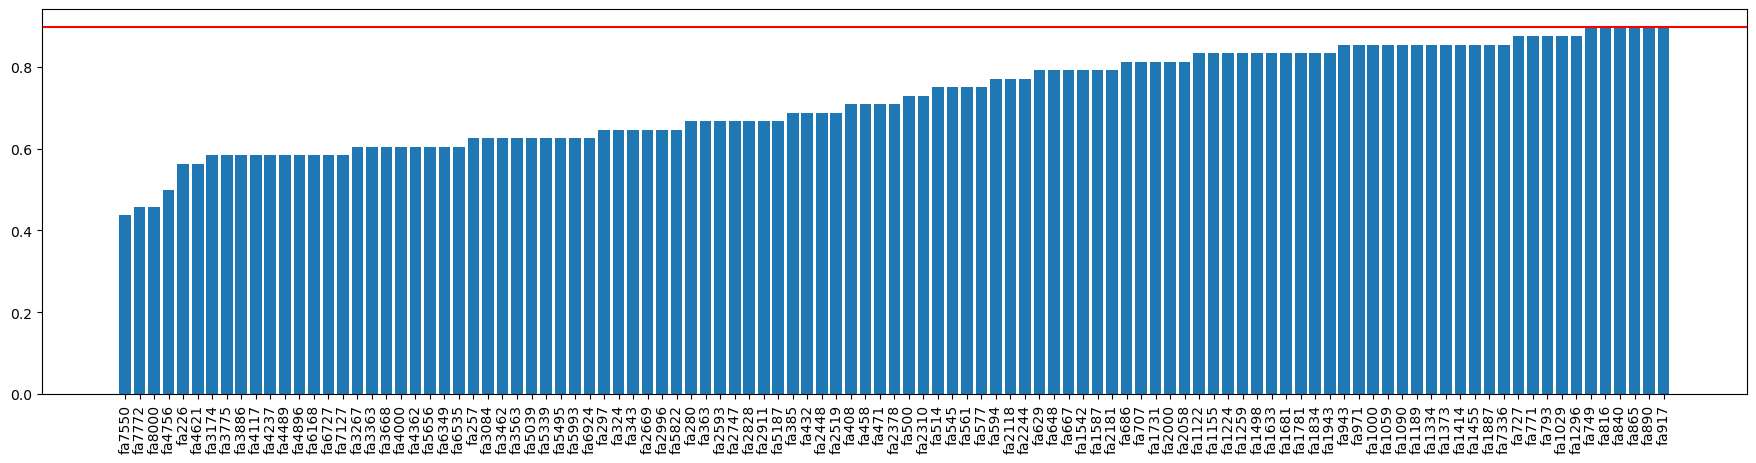

In [10]:
freqst = [x for x,y in smotetom_lr_score]
accst = [y for x,y in smotetom_lr_score]

plt.figure(figsize=(22,5))
plt.bar(freqst,accst)
plt.axhline(y=0.8958333333333334, color ='r')
plt.xticks(rotation=90)
plt.show()

### 1.2.1 Model Based on Top Individuals SMOTETomek

0.8277777777777777
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.53      0.89      0.67         9

    accuracy                           0.79        39
   macro avg       0.75      0.83      0.76        39
weighted avg       0.86      0.79      0.81        39

Feature: fa917, Score: -1.00382
Feature: fa890, Score: -0.91388
Feature: fa865, Score: -0.82763
Feature: fa840, Score: -0.71537
Feature: fa816, Score: -0.62724
Feature: fa749, Score: -0.75695
Feature: fa1296, Score: -3.42490
Feature: fa1029, Score: -1.91836
Feature: fa793, Score: -0.71195
Feature: fa771, Score: -0.81556
Feature: fa727, Score: -0.63607


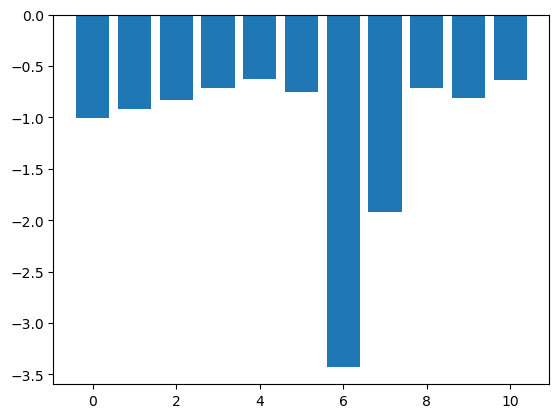

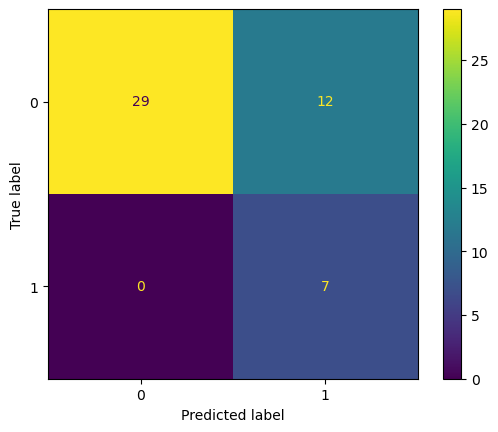

In [11]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

top3_score = []
#top3 = X_train[['fa727','fa749','fa771','fa793','fa816','fa840','fa865','fa890','fa917','fa943','fa971','fa1000','fa1029','fa1059','fa1090','fa1189','fa1296','fa1334','fa1373','fa1414','fa1455','fa1887','fa1943','fa2000']]
#top3 = X_train[['fa917','fa890','fa865','fa840','fa816','fa749']]
top3 = X_train[['fa917','fa890','fa865','fa840','fa816','fa749','fa1296','fa1029','fa793','fa771','fa727']]

X_test = X_test[(X_test.columns) & (top3.columns)]
X_val = X_val[(X_val.columns) & (top3.columns)]


model13 = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
model13.fit(top3, y_train)

y_pred = model13.predict(X_val)
acc_score = accuracy_score(y_val, y_pred)
print(recall_score(y_val, y_pred, average='macro'))
print(classification_report(y_val, y_pred))


importance = model13.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (top3.columns[i],v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

plot_confusion_matrix(model13, X_test, y_test)
plt.show()

## 1.4 SMOTEENN

In [48]:
X_train = pd.read_csv('Dataset/SMOTEENN/X_train.csv')
X_test = pd.read_csv('Dataset/SMOTEENN/X_test.csv')
y_train = pd.read_csv('Dataset/SMOTEENN/y_train.csv')
y_test = pd.read_csv('Dataset/SMOTEENN/y_test.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')

smoteenn_acc_score = []
smoteenn_lr_score = [] 

for freq in X_train:
    X = X_train[freq]
    y = y_train
    
    X = X.values
    X = X.reshape(-1,1)
    
    sc = MinMaxScaler()
    Xtr = sc.fit_transform(X)
    Xte = sc.transform(X_test[[freq]])
    
    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)

    model.fit(Xtr, y.values.ravel())
    
    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    smoteenn_acc_score = accuracy_score(y_test, y_pred)
    smoteenn_lr_score.append([freq,smoteenn_acc_score])
    
    
smoteenn_lr_score.sort(key=lambda x:x[1])
smoteenn_lr_score

[['fa4362', 0.14583333333333334],
 ['fa4489', 0.14583333333333334],
 ['fa7550', 0.14583333333333334],
 ['fa7772', 0.14583333333333334],
 ['fa8000', 0.14583333333333334],
 ['fa4621', 0.16666666666666666],
 ['fa4237', 0.20833333333333334],
 ['fa4756', 0.2916666666666667],
 ['fa4117', 0.3541666666666667],
 ['fa4896', 0.3541666666666667],
 ['fa5039', 0.3958333333333333],
 ['fa5187', 0.4375],
 ['fa3363', 0.4791666666666667],
 ['fa3775', 0.4791666666666667],
 ['fa3886', 0.4791666666666667],
 ['fa4000', 0.4791666666666667],
 ['fa5339', 0.4791666666666667],
 ['fa7336', 0.4791666666666667],
 ['fa2911', 0.5208333333333334],
 ['fa2996', 0.5208333333333334],
 ['fa3563', 0.5208333333333334],
 ['fa3084', 0.5416666666666666],
 ['fa3174', 0.5416666666666666],
 ['fa3267', 0.5416666666666666],
 ['fa3462', 0.5416666666666666],
 ['fa3668', 0.5416666666666666],
 ['fa226', 0.5625],
 ['fa257', 0.5625],
 ['fa343', 0.5625],
 ['fa363', 0.5625],
 ['fa2828', 0.5625],
 ['fa5495', 0.5625],
 ['fa6168', 0.5625],
 ['f

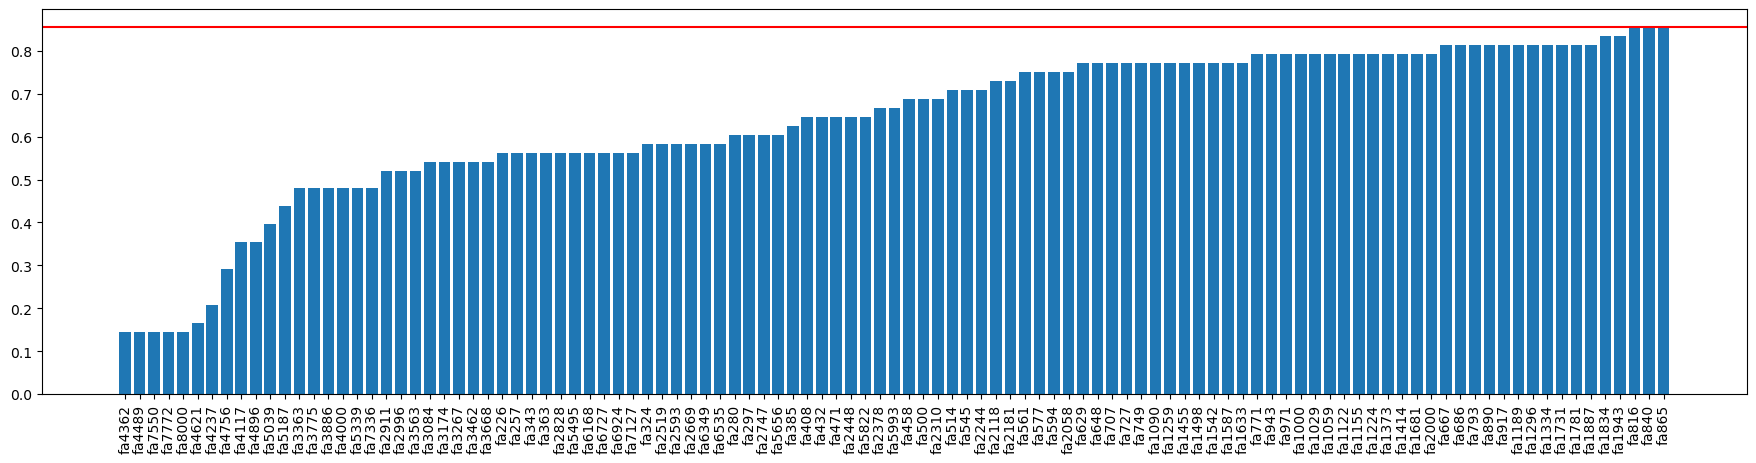

In [50]:
freqse = [x for x,y in smoteenn_lr_score]
accse = [y for x,y in smoteenn_lr_score]

plt.figure(figsize=(22,5))
plt.bar(freqse,accse)
plt.axhline(y=0.8541666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

### 1.2.1 Model Based on Top Individuals SMOTEENN

0.8777777777777778
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.67      0.89      0.76         9

    accuracy                           0.87        39
   macro avg       0.81      0.88      0.84        39
weighted avg       0.89      0.87      0.88        39

Feature: fa865, Score: -0.05973
Feature: fa890, Score: -0.01044
Feature: fa1000, Score: -0.44283
Feature: fa1029, Score: -0.33147
Feature: fa1059, Score: -0.36046
Feature: fa1122, Score: -0.53308
Feature: fa1155, Score: -0.53570
Feature: fa1189, Score: -0.86835
Feature: fa1224, Score: -0.98122
Feature: fa1296, Score: -0.70898
Feature: fa1334, Score: -0.69699
Feature: fa1373, Score: -0.64704
Feature: fa1414, Score: -0.48027
Feature: fa1681, Score: -0.06217
Feature: fa1731, Score: -0.69186
Feature: fa1781, Score: -0.79186
Feature: fa1834, Score: -0.49282
Feature: fa1887, Score: -0.17830
Feature: fa1943, Score: -0.40691


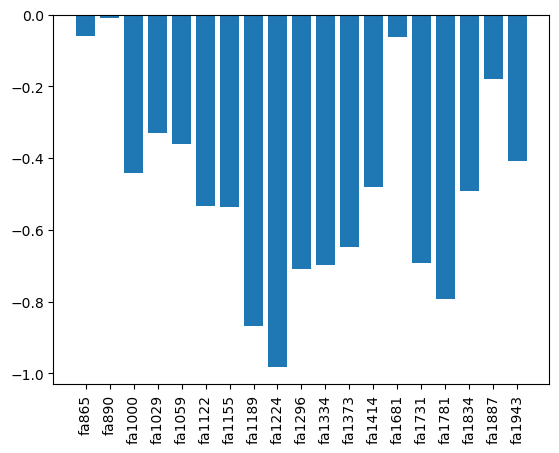

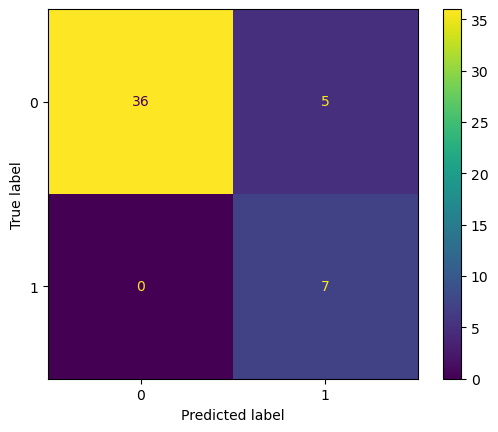

In [84]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

top4_score = []
top4 = X_train[['fa865','fa890','fa1000','fa1029','fa1059','fa1122','fa1155','fa1189','fa1224','fa1296','fa1334','fa1373','fa1414','fa1681','fa1731','fa1781','fa1834','fa1887','fa1943']]

X_test = X_test[(X_test.columns) & (top4.columns)]
X_val = X_val[(X_val.columns) & (top4.columns)]

#clf = LogisticRegression()
#grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
#model14 = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
#model14 = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.3,class_weight='balanced')
model14 = LogisticRegression(penalty = 'l2',solver='liblinear', class_weight='balanced')
model14.fit(top4, y_train)

filename = 'finalized_model.sav'
pickle.dump(model14, open(filename, 'wb'))

y_pred = model14.predict(X_val)
acc_score = accuracy_score(y_val, y_pred)
print(recall_score(y_val, y_pred, average='macro'))
print(classification_report(y_val, y_pred))
#print(model14.best_params_)

#importance = model14.best_estimator_.coef_[0]
importance = model14.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (top4.columns[i],v))

#plt.bar([x for x in range(len(importance))], importance)
plt.bar([x for x in top4.columns], importance)
plt.xticks(rotation=90)
plt.show()

plot_confusion_matrix(model14, X_test, y_test)
plt.show()

In [108]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.875


# 2 - Models for ranges of frequencies

In [20]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
considered_features = df.columns

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
68,f2669,32031.612433
45,f1373,28315.207957
59,f2058,27693.458820
50,f1587,27141.871493
44,f1334,25788.930373
...,...,...
96,f5993,1198.993537
0,f226,928.574365
104,f7550,863.303905
105,f7772,551.946194


## 2.1 Original

In [72]:
#Freq with OverallPoF
mul_acc_score = []
mul_lr_score = [] 
y = file['OverallPoF']
i = 1
#print(df)
while i < len(df.columns):
    if(i+4 > len(df.columns)):
        break
    freq = df.iloc[:,i:i+4] #4 columns at a time
    #print(freq)
    X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)
    
    #print(X_train)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mul_acc_score = accuracy_score(y_test, y_pred)
    mul_lr_score.append([list(freq.columns),mul_acc_score])
    
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
    #plot_roc_curve(model, X_test, y_test, name=freq.columns)
    #plot_confusion_matrix(model, X_test, y_test) 
    #plt.title(freq.columns)
#mul_lr_score.sort(key=lambda x:x[1], reverse=True)
#mul_lr_score
    #print(freq)


       f257    f280    f297    f324
216  0.0933  0.1314  0.1436  0.1464
36   0.1023  0.1442  0.1607  0.1558
1    0.1501  0.1860  0.2033  0.1953
179  0.0325  0.0575  0.0674  0.0621
51   0.0104  0.0287  0.0345  0.0271
..      ...     ...     ...     ...
3    0.0953  0.1190  0.1285  0.1233
130  0.1903  0.2390  0.2611  0.2626
134  0.0828  0.1060  0.1140  0.1071
155  0.1016  0.1463  0.1659  0.1633
75   0.0291  0.0507  0.0603  0.0587

[191 rows x 4 columns]
       f280    f297    f324    f343
216  0.1314  0.1436  0.1464  0.1438
36   0.1442  0.1607  0.1558  0.1494
1    0.1860  0.2033  0.1953  0.1831
179  0.0575  0.0674  0.0621  0.0536
51   0.0287  0.0345  0.0271  0.0186
..      ...     ...     ...     ...
3    0.1190  0.1285  0.1233  0.1151
130  0.2390  0.2611  0.2626  0.2528
134  0.1060  0.1140  0.1071  0.0960
155  0.1463  0.1659  0.1633  0.1586
75   0.0507  0.0603  0.0587  0.0492

[191 rows x 4 columns]
       f297    f324    f343    f363
216  0.1436  0.1464  0.1438  0.1519
36   0.1607  0.1

       f840    f865    f890    f917
216  0.5164  0.5157  0.5361  0.5487
36   0.4903  0.4839  0.4943  0.5055
1    0.4007  0.4147  0.4429  0.4798
179  0.3112  0.3195  0.3420  0.3717
51   0.1781  0.1816  0.1991  0.2241
..      ...     ...     ...     ...
3    0.5284  0.5546  0.5958  0.6482
130  0.3025  0.3046  0.3183  0.3304
134  0.3300  0.3455  0.3728  0.4052
155  0.5030  0.4978  0.5096  0.5288
75   0.3364  0.3509  0.3785  0.4130

[191 rows x 4 columns]
       f865    f890    f917    f943
216  0.5157  0.5361  0.5487  0.5347
36   0.4839  0.4943  0.5055  0.4875
1    0.4147  0.4429  0.4798  0.4845
179  0.3195  0.3420  0.3717  0.3670
51   0.1816  0.1991  0.2241  0.2176
..      ...     ...     ...     ...
3    0.5546  0.5958  0.6482  0.6715
130  0.3046  0.3183  0.3304  0.3061
134  0.3455  0.3728  0.4052  0.4069
155  0.4978  0.5096  0.5288  0.5188
75   0.3509  0.3785  0.4130  0.4157

[191 rows x 4 columns]
       f890    f917    f943    f971
216  0.5361  0.5487  0.5347  0.5200
36   0.4943  0.5

      f1781   f1834   f1887   f1943
216  0.7166  0.7431  0.7668  0.7531
36   0.5910  0.6239  0.6807  0.6894
1    0.4805  0.5129  0.5498  0.5264
179  0.4142  0.4714  0.5479  0.5541
51   0.0993  0.1607  0.2425  0.2252
..      ...     ...     ...     ...
3    0.5507  0.5811  0.5994  0.5941
130  0.2274  0.3168  0.4002  0.4104
134  0.5546  0.6147  0.6571  0.6427
155  0.5789  0.5992  0.6363  0.6173
75   0.4011  0.4641  0.5421  0.5546

[191 rows x 4 columns]
      f1834   f1887   f1943   f2000
216  0.7431  0.7668  0.7531  0.7257
36   0.6239  0.6807  0.6894  0.6630
1    0.5129  0.5498  0.5264  0.4878
179  0.4714  0.5479  0.5541  0.5320
51   0.1607  0.2425  0.2252  0.1723
..      ...     ...     ...     ...
3    0.5811  0.5994  0.5941  0.6116
130  0.3168  0.4002  0.4104  0.3753
134  0.6147  0.6571  0.6427  0.6290
155  0.5992  0.6363  0.6173  0.5708
75   0.4641  0.5421  0.5546  0.5559

[191 rows x 4 columns]
      f1887   f1943   f2000   f2058
216  0.7668  0.7531  0.7257  0.7242
36   0.6807  0.6

      f4000   f4117   f4237   f4362
216  0.9561  0.9398  0.8979  0.8389
36   0.4674  0.5030  0.4960  0.4692
1    0.8420  0.8163  0.7737  0.7189
179  0.7853  0.8037  0.7927  0.7687
51   0.3903  0.3479  0.3237  0.2990
..      ...     ...     ...     ...
3    0.5868  0.5774  0.5397  0.4777
130  0.8633  0.8960  0.9106  0.9159
134  0.9318  0.9220  0.9200  0.9145
155  0.6325  0.6580  0.6519  0.6192
75   0.9339  0.9093  0.8853  0.8606

[191 rows x 4 columns]
      f4117   f4237   f4362   f4489
216  0.9398  0.8979  0.8389  0.7989
36   0.5030  0.4960  0.4692  0.4633
1    0.8163  0.7737  0.7189  0.6694
179  0.8037  0.7927  0.7687  0.7616
51   0.3479  0.3237  0.2990  0.2666
..      ...     ...     ...     ...
3    0.5774  0.5397  0.4777  0.4245
130  0.8960  0.9106  0.9159  0.9193
134  0.9220  0.9200  0.9145  0.8926
155  0.6580  0.6519  0.6192  0.6048
75   0.9093  0.8853  0.8606  0.8290

[191 rows x 4 columns]
      f4237   f4362   f4489   f4621
216  0.8979  0.8389  0.7989  0.7212
36   0.4960  0.4

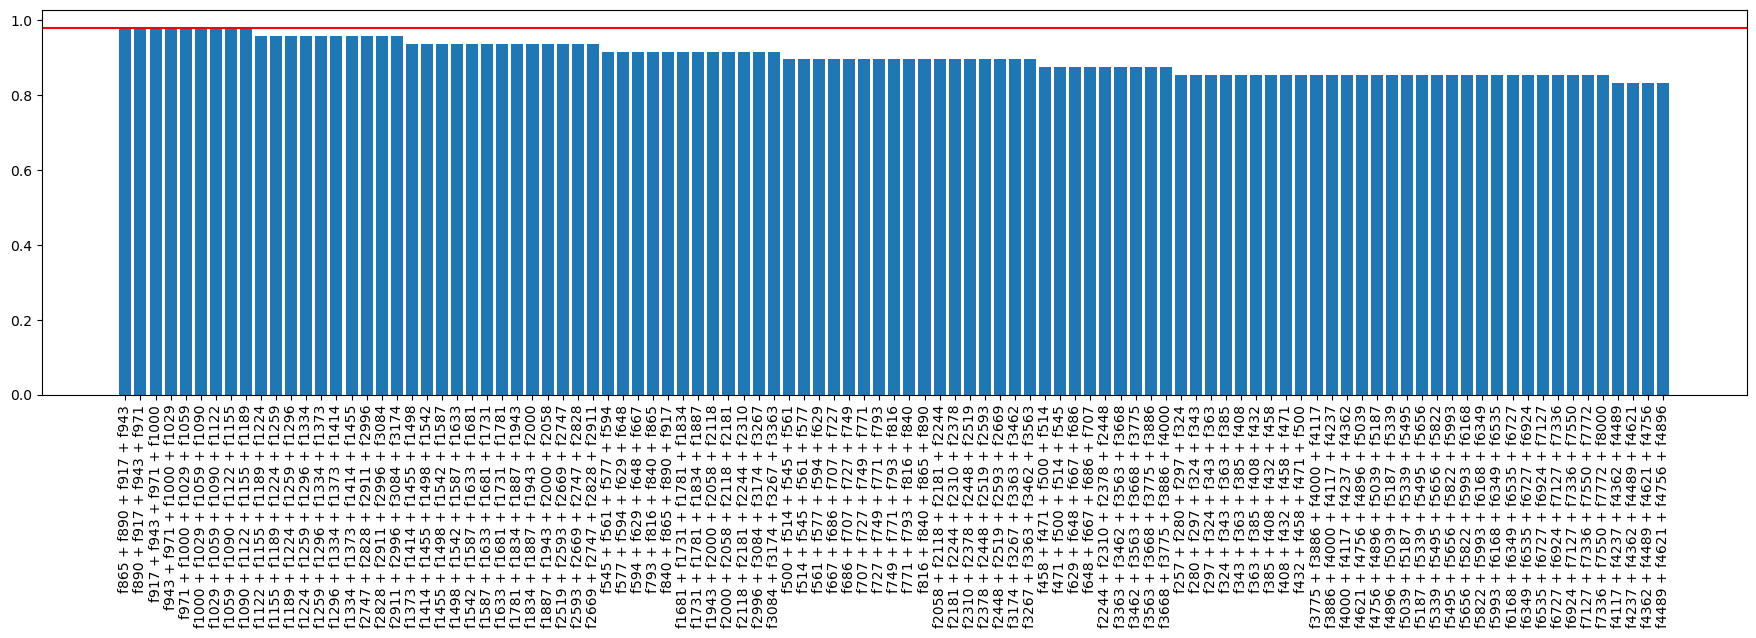

In [12]:
#mul_lr_score.sort(key=lambda x:x[1], reverse=True)
#mul_lr_score = mul_lr_score[:10]
freqmul = [x for x,y in mul_lr_score]
accmul = [y for x,y in mul_lr_score]
freqmul = [' + '.join(x) for x in freqmul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freqmul,accmul)
plt.axhline(y=0.9791666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

### 2.1.1 GridSearchCV Original

In [13]:
gs_mul_acc_score = []
gs_mul_lr_score = [] 
y = file['OverallPoF']
i = 1
#print(df)
while i < len(df.columns):
    if(i+4 > len(df.columns)):
        break
    freq = df.iloc[:,i:i+4] #4 columns at a time
    X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)
    
    clf = LogisticRegression()
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(X_train, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(X_test)
    gs_mul_acc_score = accuracy_score(y_test, y_pred)
    gs_mul_lr_score.append([list(freq.columns),gs_mul_acc_score,grid_clf_acc.best_params_])
    
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
gs_mul_lr_score.sort(key=lambda x:x[1])
gs_mul_lr_score

[[['f4117', 'f4237', 'f4362', 'f4489'],
  0.8333333333333334,
  {'l1_ratio': 0.3,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['f4237', 'f4362', 'f4489', 'f4621'],
  0.8333333333333334,
  {'l1_ratio': 0.2,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['f4362', 'f4489', 'f4621', 'f4756'],
  0.8333333333333334,
  {'l1_ratio': 0,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['f4489', 'f4621', 'f4756', 'f4896'],
  0.8333333333333334,
  {'l1_ratio': 0,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['f257', 'f280', 'f297', 'f324'],
  0.8541666666666666,
  {'l1_ratio': 0,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['f280', 'f297', 'f324', 'f343'],
  0.8541666666666666,
  {'l1_ratio': 0,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['f297', 'f324', 'f343', 'f363'],
  0.8541666666666666,
  {'l1_ratio': 0,
   'max_iter': 5

0.8611111111111112
Feature: f771, Score: -0.13008
Feature: f793, Score: -0.23315
Feature: f816, Score: -0.00360
Feature: f840, Score: 0.00000
Feature: f865, Score: 0.00000
Feature: f890, Score: 0.00000
Feature: f943, Score: 0.00000
Feature: f971, Score: -0.06929
Feature: f1000, Score: -0.41774
Feature: f1090, Score: 0.00000
Feature: f1189, Score: 0.00000
Feature: f1296, Score: -0.56147


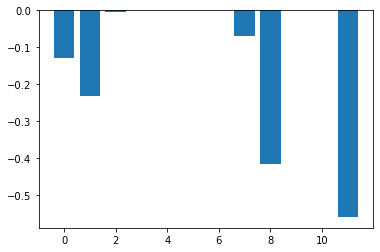

In [63]:
top5_score = []
#top1 = file[['f865', 'f890', 'f917', 'f943']]
top5 = file[['f865', 'f890', 'f917', 'f943', 'f971', 'f1000', 'f1029', 'f1059', 'f1090', 'f1122', 'f1155', 'f1189']]
#top1 = file[['f749','f917','f1029','f1122','f1155','f1224','f1259','f1498','f1633','f1681','f1781','f1834','f2000','f771','f793','f816','f840','f865','f890','f943','f971','f1000','f1090','f1189','f1296','f1334','f1373','f1414','f1455','f1887','f1943','f6924','f7127']]
y = file['OverallPoF']

X_train, X_test, y_train, y_test = train_test_split(top5, y, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, # X
        y_train, # y
        test_size = 0.2, 
        random_state = 12
)
#print(X_test)

OGXtrain = X_train
OGytrain = y_train
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

model11 = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
model11.fit(X_train, y_train)

y_pred = model11.predict(X_val)
acc_score = accuracy_score(y_val, y_pred)

print(recall_score(y_val, y_pred, average='macro'))

#print(classification_report(y_val, y_pred))

#Negative scores predict class 0
importance = model11.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (top1.columns[i],v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

#plot_confusion_matrix(model11, X_test, y_test)
#plt.show()

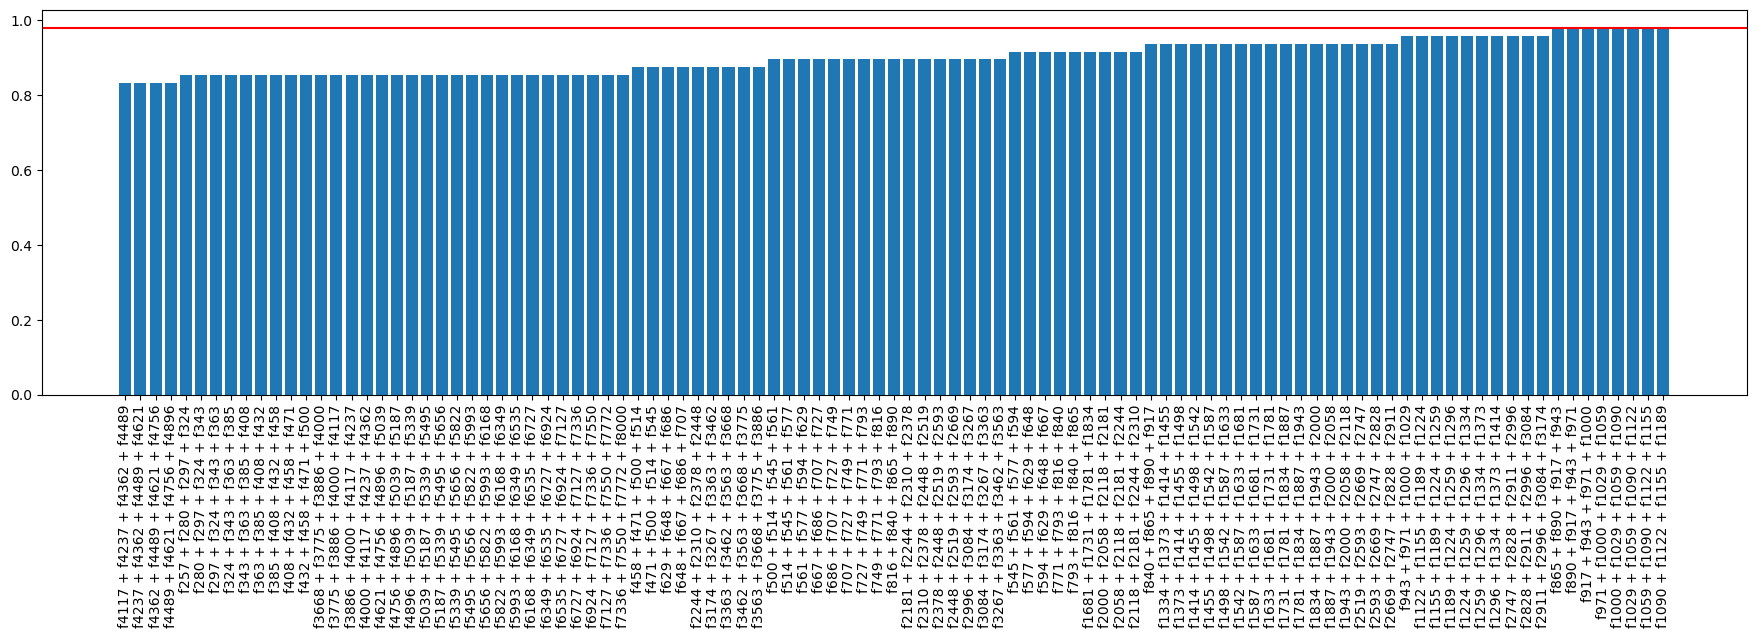

In [14]:
freqmulgs = [x for x,y,z in gs_mul_lr_score]
accmulgs = [y for x,y,z in gs_mul_lr_score]
freqmulgs = [' + '.join(x) for x in freqmulgs]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freqmulgs,accmulgs)
plt.axhline(y=0.9791666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

## 2.2 SMOTE

In [15]:
X_train = pd.read_csv('Dataset/SMOTE/X_train.csv')
X_test = pd.read_csv('Dataset/SMOTE/X_test.csv')
y_train = pd.read_csv('Dataset/SMOTE/y_train.csv')
y_test = pd.read_csv('Dataset/SMOTE/y_test.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')

#print(len(X_train.columns))

smote_mul_acc_score = []
smote_mul_lr_score = [] 
y = file['OverallPoF']
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    col = X_train.iloc[:,i:i+4].columns
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    smote_mul_acc_score = accuracy_score(y_test, y_pred)
    smote_mul_lr_score.append([list(col),smote_mul_acc_score])
    
#    print(list(col),'\n', classification_report(y_test, y_pred))
    
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
smote_mul_lr_score.sort(key=lambda x:x[1])
smote_mul_lr_score

[[['fa3267', 'fa3363', 'fa3462', 'fa3563'], 0.6041666666666666],
 [['fa3668', 'fa3775', 'fa3886', 'fa4000'], 0.6041666666666666],
 [['fa3174', 'fa3267', 'fa3363', 'fa3462'], 0.625],
 [['fa3363', 'fa3462', 'fa3563', 'fa3668'], 0.625],
 [['fa3462', 'fa3563', 'fa3668', 'fa3775'], 0.625],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'], 0.625],
 [['fa3775', 'fa3886', 'fa4000', 'fa4117'], 0.625],
 [['fa4489', 'fa4621', 'fa4756', 'fa4896'], 0.625],
 [['fa4621', 'fa4756', 'fa4896', 'fa5039'], 0.625],
 [['fa5187', 'fa5339', 'fa5495', 'fa5656'], 0.625],
 [['fa5339', 'fa5495', 'fa5656', 'fa5822'], 0.625],
 [['fa6727', 'fa6924', 'fa7127', 'fa7336'], 0.625],
 [['fa2669', 'fa2747', 'fa2828', 'fa2911'], 0.6458333333333334],
 [['fa4000', 'fa4117', 'fa4237', 'fa4362'], 0.6458333333333334],
 [['fa5039', 'fa5187', 'fa5339', 'fa5495'], 0.6458333333333334],
 [['fa5495', 'fa5656', 'fa5822', 'fa5993'], 0.6458333333333334],
 [['fa2747', 'fa2828', 'fa2911', 'fa2996'], 0.6666666666666666],
 [['fa7336', 'fa7550', 'f

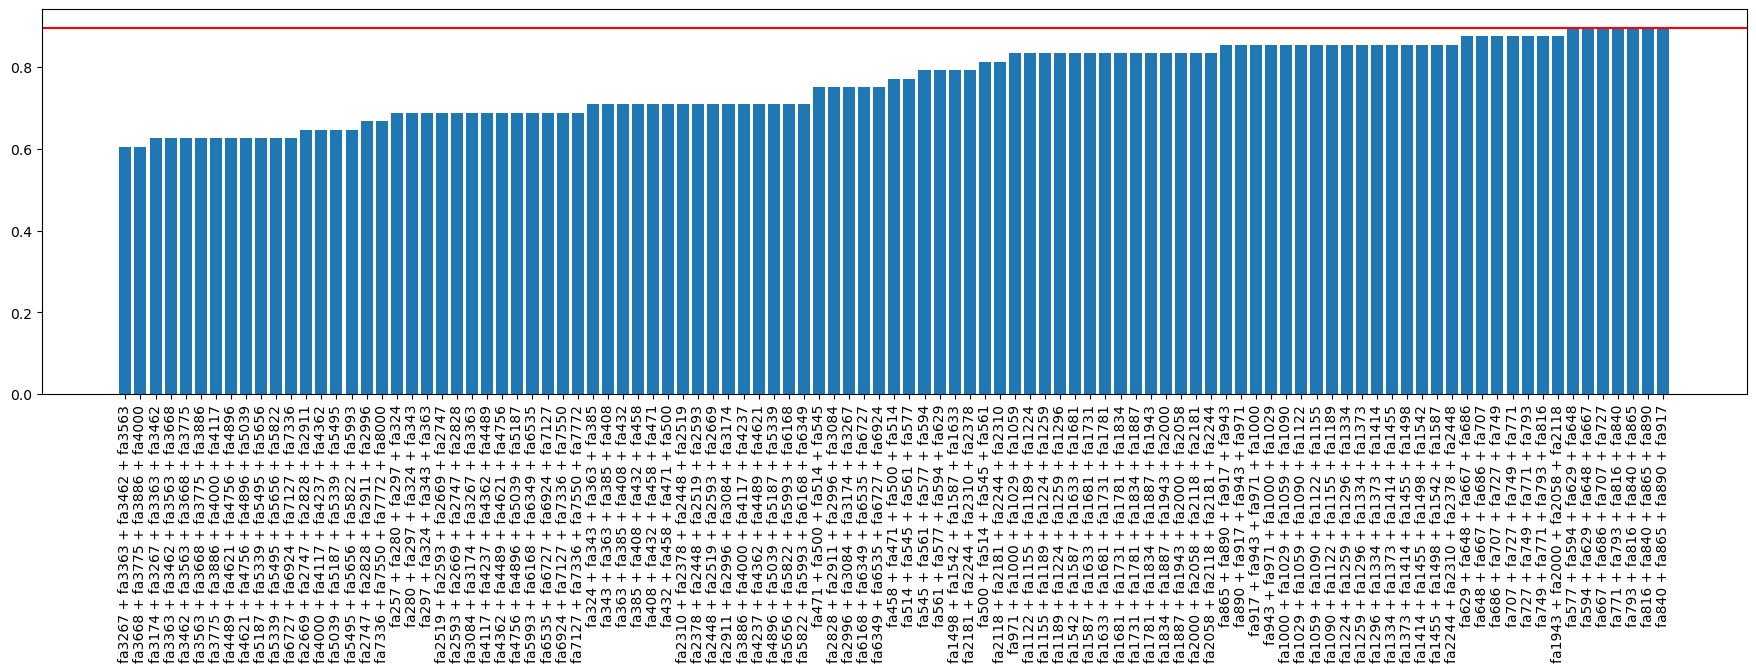

In [16]:
freq_smote_mul = [x for x,y in smote_mul_lr_score]
acc_smote_mul = [y for x,y in smote_mul_lr_score]
freq_smote_mul = [' + '.join(x) for x in freq_smote_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_smote_mul,acc_smote_mul)
plt.axhline(y=0.8958333333333334, color ='r')

plt.xticks(rotation=90)
plt.show()

### 2.2.1 GridSearchCV SMOTE

In [68]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

gs_smote_mul_acc_score = []
gs_smote_mul_lr_score = [] 
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xte)
    gs_smote_mul_acc_score = accuracy_score(y_test, y_pred)
    gs_smote_mul_lr_score.append([list(X_train.iloc[:,i:i+4].columns),gs_smote_mul_acc_score,grid_clf_acc.best_params_])
    
    
    i = i + 1
gs_smote_mul_lr_score.sort(key=lambda x:x[1])
gs_smote_mul_lr_score

[[['fa3267', 'fa3363', 'fa3462', 'fa3563'],
  0.6041666666666666,
  {'l1_ratio': 0,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['fa4489', 'fa4621', 'fa4756', 'fa4896'],
  0.6041666666666666,
  {'l1_ratio': 0.9,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['fa3174', 'fa3267', 'fa3363', 'fa3462'],
  0.625,
  {'l1_ratio': 0.3,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['fa3363', 'fa3462', 'fa3563', 'fa3668'],
  0.625,
  {'l1_ratio': 0.8,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['fa3462', 'fa3563', 'fa3668', 'fa3775'],
  0.625,
  {'l1_ratio': 0,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'],
  0.625,
  {'l1_ratio': 0.4,
   'max_iter': 5000,
   'penalty': 'elasticnet',
   'solver': 'saga'}],
 [['fa3668', 'fa3775', 'fa3886', 'fa4000'],
  0.625,
  {'l1_ratio': 0.9,
   'max_iter': 5000,
   'penalty': 

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.53      0.89      0.67         9

    accuracy                           0.79        39
   macro avg       0.75      0.83      0.76        39
weighted avg       0.86      0.79      0.81        39

0.8277777777777777
Feature: fa749, Score: 0.00000
Feature: fa771, Score: 0.00000
Feature: fa793, Score: -0.00419
Feature: fa865, Score: -0.23853
Feature: fa1943, Score: -0.53405
Feature: fa2000, Score: -1.41063
Feature: fa816, Score: -1.39290
Feature: fa840, Score: -1.40816
Feature: fa890, Score: -1.55514
Feature: fa917, Score: -1.78935
Feature: fa943, Score: -2.03703
Feature: fa971, Score: -2.33493


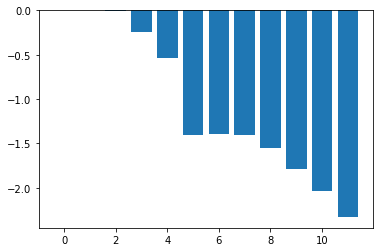

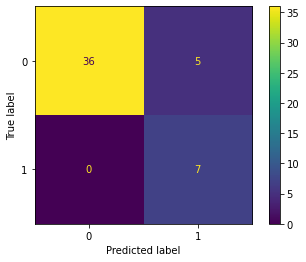

In [74]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

#print(X_train[['fa577']])

top6_score = []
top6 = X_train[['fa577', 'fa594', 'fa629', 'fa648', 'fa667', 'fa771', 'fa793', 'fa816', 'fa840', 'fa865', 'fa890', 'fa917']]

X_test = X_test[(X_test.columns) & (top6.columns)]
X_val = X_val[(X_val.columns) & (top6.columns)]

model12 = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
model12.fit(top6, y_train)


y_pred = model12.predict(X_val)
acc_score = accuracy_score(y_val, y_pred)
#print(acc_score)
print(classification_report(y_val, y_pred))

print(recall_score(y_val, y_pred, average='macro'))

importance = model12.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (top2.columns[i],v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

plot_confusion_matrix(model12, X_test, y_test)
plt.show()

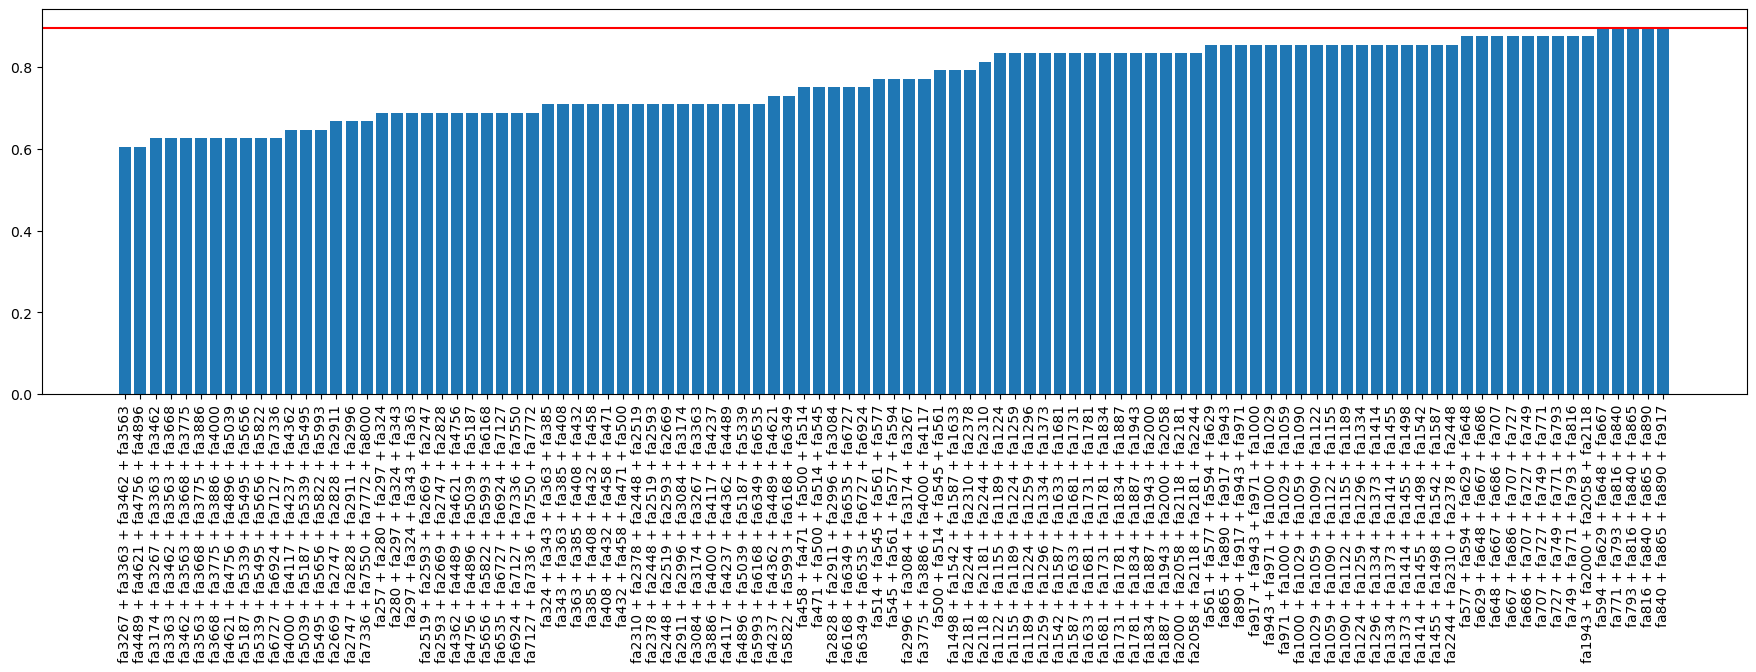

In [18]:
freq_gs_smote_mul = [x for x,y,z in gs_smote_mul_lr_score]
acc_gs_smote_mul = [y for x,y,z in gs_smote_mul_lr_score]
freq_gs_smote_mul = [' + '.join(x) for x in freq_gs_smote_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_gs_smote_mul,acc_gs_smote_mul)
plt.axhline(y=0.8958333333333334, color ='r')
plt.xticks(rotation=90)
plt.show()

## 2.3 SMOTETomek

In [19]:
X_train = pd.read_csv('Dataset/SMOTETomek/X_train.csv')
X_test = pd.read_csv('Dataset/SMOTETomek/X_test.csv')
y_train = pd.read_csv('Dataset/SMOTETomek/y_train.csv')
y_test = pd.read_csv('Dataset/SMOTETomek/y_test.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')

smotetom_mul_acc_score = []
smotetom_mul_lr_score = [] 
y = file['OverallPoF']
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    smotetom_mul_acc_score = accuracy_score(y_test, y_pred)
    smotetom_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),smotetom_mul_acc_score])
    
    #print(list(X_train.iloc[:,i:i+4]),'\n', classification_report(y_test, y_pred))
    
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
smotetom_mul_lr_score.sort(key=lambda x:x[1])
smotetom_mul_lr_score

[[['fa3174', 'fa3267', 'fa3363', 'fa3462'], 0.6041666666666666],
 [['fa3267', 'fa3363', 'fa3462', 'fa3563'], 0.6041666666666666],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'], 0.6041666666666666],
 [['fa2828', 'fa2911', 'fa2996', 'fa3084'], 0.625],
 [['fa3363', 'fa3462', 'fa3563', 'fa3668'], 0.625],
 [['fa3462', 'fa3563', 'fa3668', 'fa3775'], 0.625],
 [['fa3668', 'fa3775', 'fa3886', 'fa4000'], 0.625],
 [['fa6924', 'fa7127', 'fa7336', 'fa7550'], 0.625],
 [['fa257', 'fa280', 'fa297', 'fa324'], 0.6458333333333334],
 [['fa280', 'fa297', 'fa324', 'fa343'], 0.6458333333333334],
 [['fa2669', 'fa2747', 'fa2828', 'fa2911'], 0.6458333333333334],
 [['fa2747', 'fa2828', 'fa2911', 'fa2996'], 0.6458333333333334],
 [['fa3084', 'fa3174', 'fa3267', 'fa3363'], 0.6458333333333334],
 [['fa5039', 'fa5187', 'fa5339', 'fa5495'], 0.6458333333333334],
 [['fa5187', 'fa5339', 'fa5495', 'fa5656'], 0.6458333333333334],
 [['fa7127', 'fa7336', 'fa7550', 'fa7772'], 0.6458333333333334],
 [['fa2519', 'fa2593', 'fa2669', 

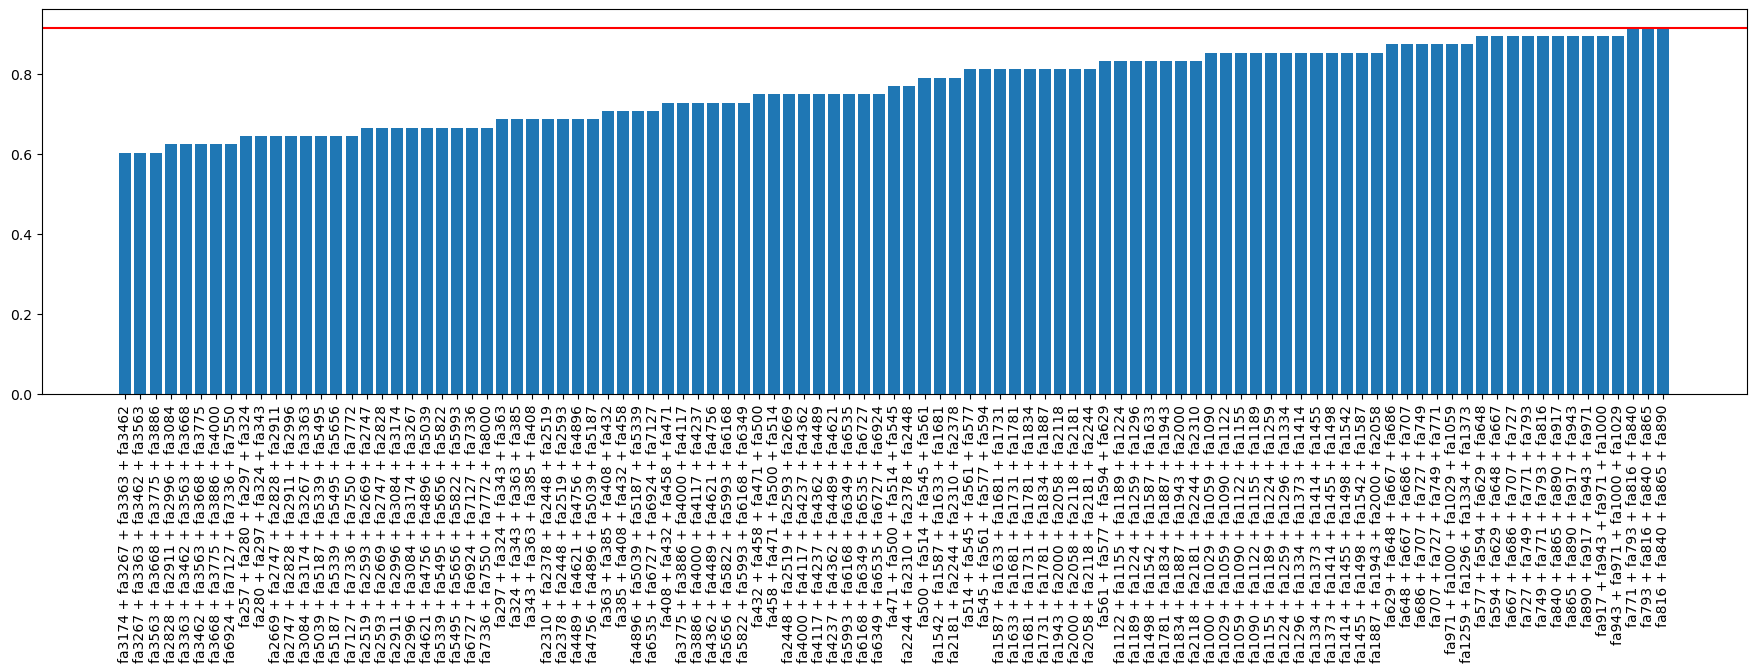

In [20]:
freq_smotetom_mul = [x for x,y in smotetom_mul_lr_score]
acc_smotetom_mul = [y for x,y in smotetom_mul_lr_score]
freq_smotetom_mul = [' + '.join(x) for x in freq_smotetom_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_smotetom_mul,acc_smotetom_mul)
plt.axhline(y=0.915, color ='r')

plt.xticks(rotation=90)
plt.show()

### 2.3.1 GridSearchCV SMOTETomek

In [86]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

gs_smotetom_mul_acc_score = []
gs_smotetom_mul_lr_score = [] 
rcl = []
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    Xval = sc.transform(Xval)
    
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
   

    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xval)
    rc = recall_score(y_val, y_pred, average='macro')
    rcl.append([list(X_train.iloc[:,i:i+4]), rc])
    #gs_smotetom_mul_acc_score = accuracy_score(y_train, y_pred)
    #gs_smotetom_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),gs_smotetom_mul_acc_score,grid_clf_acc.best_params_])
    
    
    i = i + 1
#gs_smotetom_mul_lr_score.sort(key=lambda x:x[1])
#gs_smotetom_mul_lr_score
rcl

[[['fa257', 'fa280', 'fa297', 'fa324'], 0.6222222222222222],
 [['fa280', 'fa297', 'fa324', 'fa343'], 0.6222222222222222],
 [['fa297', 'fa324', 'fa343', 'fa363'], 0.6222222222222222],
 [['fa324', 'fa343', 'fa363', 'fa385'], 0.6944444444444444],
 [['fa343', 'fa363', 'fa385', 'fa408'], 0.6777777777777778],
 [['fa363', 'fa385', 'fa408', 'fa432'], 0.7333333333333334],
 [['fa385', 'fa408', 'fa432', 'fa458'], 0.7166666666666667],
 [['fa408', 'fa432', 'fa458', 'fa471'], 0.7166666666666667],
 [['fa432', 'fa458', 'fa471', 'fa500'], 0.7333333333333334],
 [['fa458', 'fa471', 'fa500', 'fa514'], 0.8055555555555556],
 [['fa471', 'fa500', 'fa514', 'fa545'], 0.788888888888889],
 [['fa500', 'fa514', 'fa545', 'fa561'], 0.8611111111111112],
 [['fa514', 'fa545', 'fa561', 'fa577'], 0.788888888888889],
 [['fa545', 'fa561', 'fa577', 'fa594'], 0.7166666666666667],
 [['fa561', 'fa577', 'fa594', 'fa629'], 0.8277777777777777],
 [['fa577', 'fa594', 'fa629', 'fa648'], 0.8277777777777777],
 [['fa594', 'fa629', 'fa64

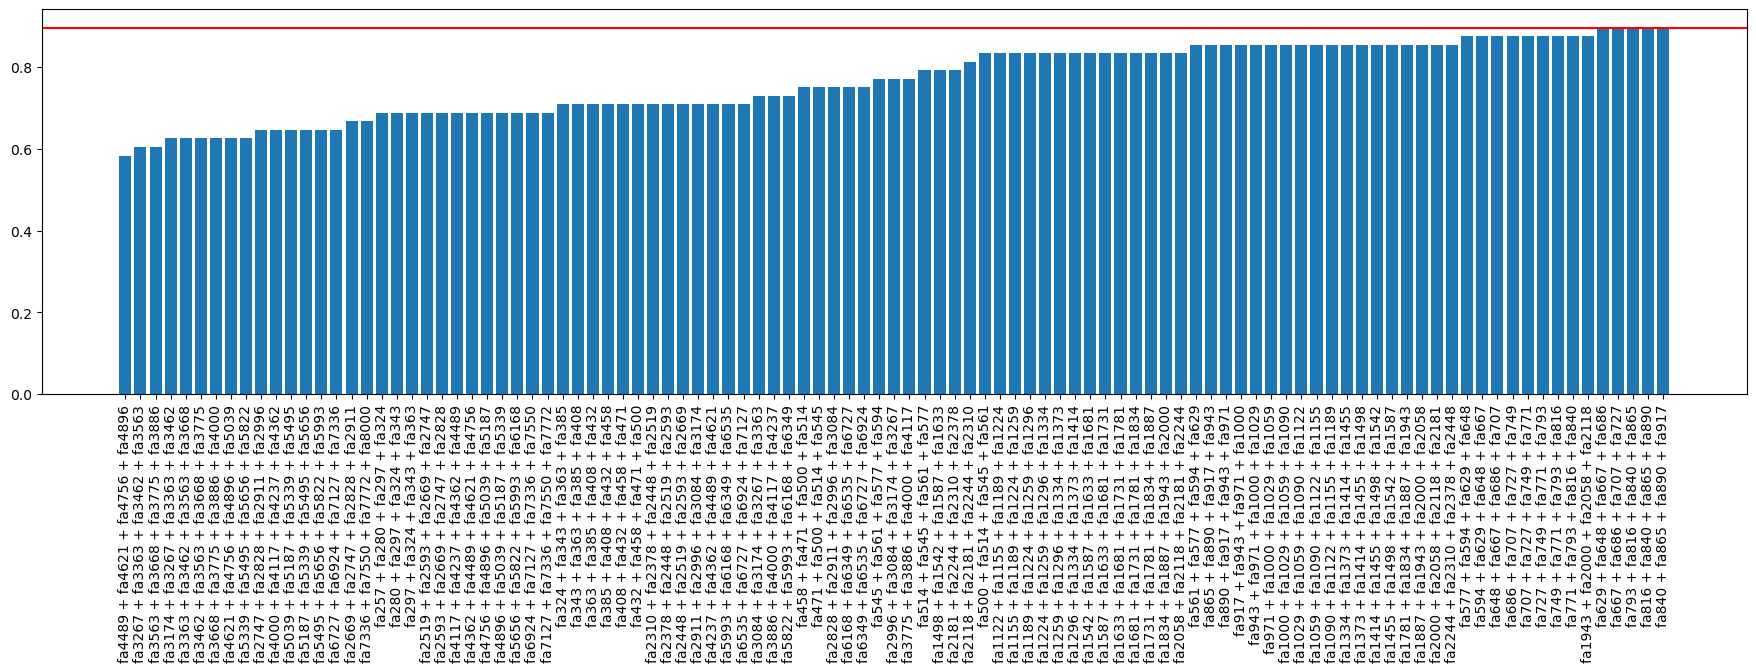

In [22]:
freq_gs_smotetom_mul = [x for x,y,z in gs_smotetom_mul_lr_score]
acc_gs_smotetom_mul = [y for x,y,z in gs_smotetom_mul_lr_score]
freq_gs_smotetom_mul = [' + '.join(x) for x in freq_gs_smotetom_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_gs_smotetom_mul,acc_gs_smotetom_mul)
plt.axhline(y=0.8958333333333334, color ='r')
plt.xticks(rotation=90)
plt.show()

## 2.4 SMOTEENN

In [23]:
X_train = pd.read_csv('Dataset/SMOTEENN/X_train.csv')
X_test = pd.read_csv('Dataset/SMOTEENN/X_test.csv')
y_train = pd.read_csv('Dataset/SMOTEENN/y_train.csv')
y_test = pd.read_csv('Dataset/SMOTEENN/y_test.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')

smoteenn_mul_acc_score = []
smoteenn_mul_lr_score = [] 
y = file['OverallPoF']
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    smoteenn_mul_acc_score = accuracy_score(y_test, y_pred)
    smoteenn_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),smoteenn_mul_acc_score])
    
    #print(list(Xtr.columns),'\n', classification_report(y_test, y_pred))
    
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
smoteenn_mul_lr_score.sort(key=lambda x:x[1])
smoteenn_mul_lr_score

[[['fa4489', 'fa4621', 'fa4756', 'fa4896'], 0.5],
 [['fa4237', 'fa4362', 'fa4489', 'fa4621'], 0.5208333333333334],
 [['fa3084', 'fa3174', 'fa3267', 'fa3363'], 0.5625],
 [['fa3174', 'fa3267', 'fa3363', 'fa3462'], 0.5625],
 [['fa3267', 'fa3363', 'fa3462', 'fa3563'], 0.5625],
 [['fa3462', 'fa3563', 'fa3668', 'fa3775'], 0.5625],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'], 0.5625],
 [['fa3668', 'fa3775', 'fa3886', 'fa4000'], 0.5625],
 [['fa4117', 'fa4237', 'fa4362', 'fa4489'], 0.5625],
 [['fa4362', 'fa4489', 'fa4621', 'fa4756'], 0.5625],
 [['fa6727', 'fa6924', 'fa7127', 'fa7336'], 0.5625],
 [['fa7336', 'fa7550', 'fa7772', 'fa8000'], 0.5625],
 [['fa3363', 'fa3462', 'fa3563', 'fa3668'], 0.5833333333333334],
 [['fa3775', 'fa3886', 'fa4000', 'fa4117'], 0.5833333333333334],
 [['fa3886', 'fa4000', 'fa4117', 'fa4237'], 0.5833333333333334],
 [['fa4621', 'fa4756', 'fa4896', 'fa5039'], 0.5833333333333334],
 [['fa4000', 'fa4117', 'fa4237', 'fa4362'], 0.6041666666666666],
 [['fa5039', 'fa5187', 'fa5339

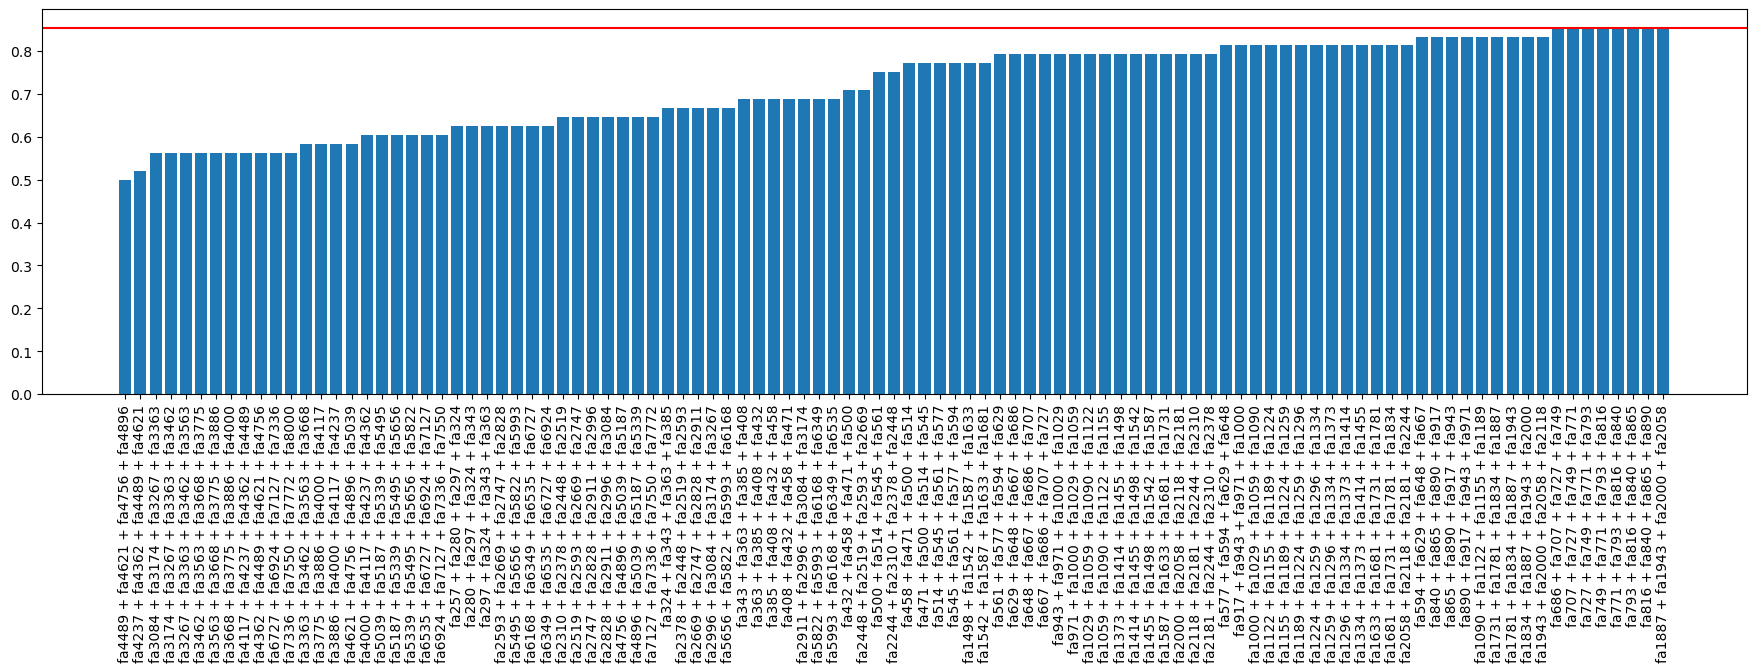

In [24]:
freq_smoteenn_mul = [x for x,y in smoteenn_mul_lr_score]
acc_smoteenn_mul = [y for x,y in smoteenn_mul_lr_score]
freq_smoteenn_mul = [' + '.join(x) for x in freq_smoteenn_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_smoteenn_mul,acc_smoteenn_mul)
plt.axhline(y=0.8541666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

### 2.4.1 GridSearchCV SMOTEENN

In [85]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

gs_smoteenn_mul_acc_score = []
gs_smoteenn_mul_lr_score = [] 
rcl = []
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    Xval = sc.transform(Xval)
    
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xval)
    
    rc = recall_score(y_val, y_pred, average='macro')
    rcl.append([list(X_train.iloc[:,i:i+4]), rc])
    
    #gs_smoteenn_mul_acc_score = accuracy_score(y_train, y_pred)
    #gs_smoteenn_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),gs_smoteenn_mul_acc_score,grid_clf_acc.best_params_])
    
    
    i = i + 1
#gs_smotetom_mul_lr_score.sort(key=lambda x:x[1])
#gs_smoteenn_mul_lr_score
rcl

[[['fa257', 'fa280', 'fa297', 'fa324'], 0.6055555555555556],
 [['fa280', 'fa297', 'fa324', 'fa343'], 0.6055555555555556],
 [['fa297', 'fa324', 'fa343', 'fa363'], 0.6055555555555556],
 [['fa324', 'fa343', 'fa363', 'fa385'], 0.6666666666666666],
 [['fa343', 'fa363', 'fa385', 'fa408'], 0.6833333333333333],
 [['fa363', 'fa385', 'fa408', 'fa432'], 0.6499999999999999],
 [['fa385', 'fa408', 'fa432', 'fa458'], 0.6499999999999999],
 [['fa408', 'fa432', 'fa458', 'fa471'], 0.6666666666666666],
 [['fa432', 'fa458', 'fa471', 'fa500'], 0.6833333333333333],
 [['fa458', 'fa471', 'fa500', 'fa514'], 0.7555555555555555],
 [['fa471', 'fa500', 'fa514', 'fa545'], 0.7555555555555555],
 [['fa500', 'fa514', 'fa545', 'fa561'], 0.7722222222222223],
 [['fa514', 'fa545', 'fa561', 'fa577'], 0.7555555555555555],
 [['fa545', 'fa561', 'fa577', 'fa594'], 0.7388888888888889],
 [['fa561', 'fa577', 'fa594', 'fa629'], 0.8111111111111111],
 [['fa577', 'fa594', 'fa629', 'fa648'], 0.8277777777777777],
 [['fa594', 'fa629', 'fa

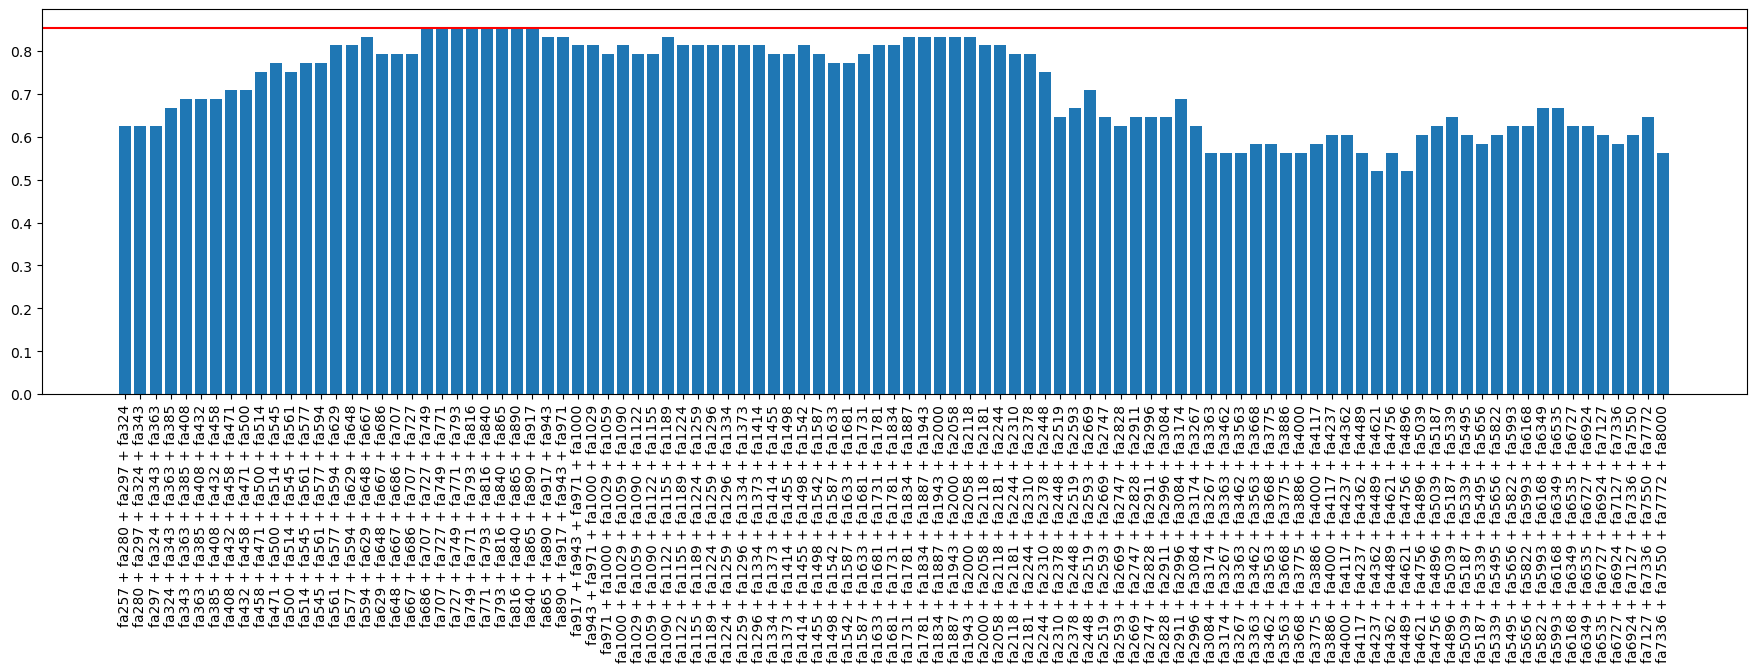

In [26]:
freq_gs_smoteenn_mul = [x for x,y,z in gs_smoteenn_mul_lr_score]
acc_gs_smoteenn_mul = [y for x,y,z in gs_smoteenn_mul_lr_score]
freq_gs_smoteenn_mul = [' + '.join(x) for x in freq_gs_smoteenn_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_gs_smoteenn_mul,acc_gs_smoteenn_mul)
plt.axhline(y=0.8541666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

# 3 - Feature Selection

## 3.1 - Variance Threshold 

### 3.1.1 Original

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

var_thr = VarianceThreshold(threshold = 0.025)
var_thr.fit(X_train)

dropVal = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]

X_train = X_train.drop(dropVal, axis=1)
X_test = X_test.drop(dropVal, axis=1)
#X_val = X_val.drop(dropVal, axis=1)

fs_mul_acc_score = []
fs_mul_lr_score = [] 
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    fs_mul_acc_score = accuracy_score(y_test, y_pred)
    fs_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),fs_mul_acc_score])
        
    i = i + 1
    #print(list(X_train.iloc[:,i:i+4]),'\n', classification_report(y_test, y_pred))
mul_lr_score.sort(key=lambda x:x[1], reverse=True)
mul_lr_score
    #print(freq)

[[['f865', 'f890', 'f917', 'f943'], 0.9791666666666666],
 [['f890', 'f917', 'f943', 'f971'], 0.9791666666666666],
 [['f917', 'f943', 'f971', 'f1000'], 0.9791666666666666],
 [['f943', 'f971', 'f1000', 'f1029'], 0.9791666666666666],
 [['f971', 'f1000', 'f1029', 'f1059'], 0.9791666666666666],
 [['f1000', 'f1029', 'f1059', 'f1090'], 0.9791666666666666],
 [['f1029', 'f1059', 'f1090', 'f1122'], 0.9791666666666666],
 [['f1059', 'f1090', 'f1122', 'f1155'], 0.9791666666666666],
 [['f1090', 'f1122', 'f1155', 'f1189'], 0.9791666666666666],
 [['f1122', 'f1155', 'f1189', 'f1224'], 0.9583333333333334],
 [['f1155', 'f1189', 'f1224', 'f1259'], 0.9583333333333334],
 [['f1189', 'f1224', 'f1259', 'f1296'], 0.9583333333333334],
 [['f1224', 'f1259', 'f1296', 'f1334'], 0.9583333333333334],
 [['f1259', 'f1296', 'f1334', 'f1373'], 0.9583333333333334],
 [['f1296', 'f1334', 'f1373', 'f1414'], 0.9583333333333334],
 [['f1334', 'f1373', 'f1414', 'f1455'], 0.9583333333333334],
 [['f2747', 'f2828', 'f2911', 'f2996']

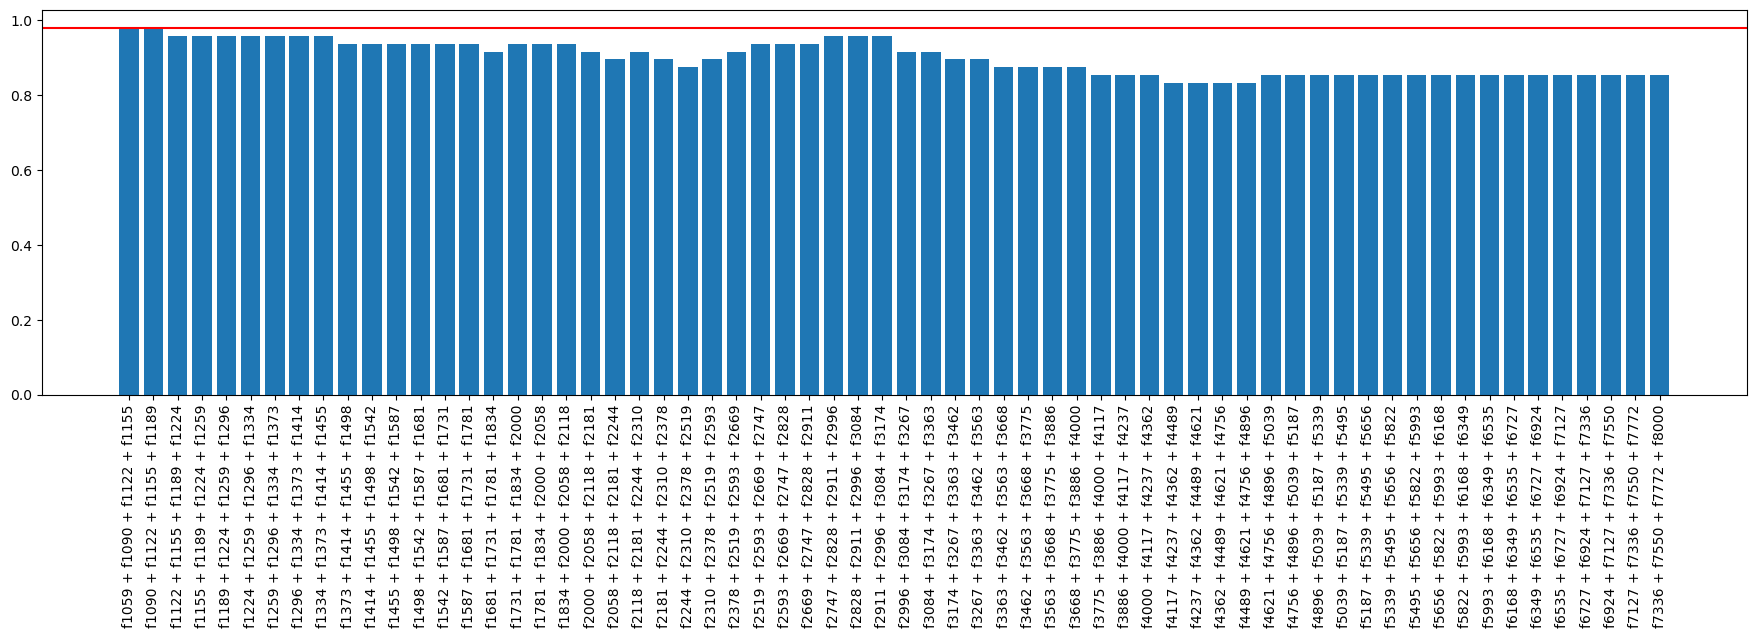

In [28]:
freq_fs_mul = [x for x,y in fs_mul_lr_score]
acc_fs_mul = [y for x,y in fs_mul_lr_score]
freq_fs_mul = [' + '.join(x) for x in freq_fs_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_fs_mul,acc_fs_mul)
plt.axhline(y=0.9791666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

#### 3.1.1.1 GridSearch Original

In [100]:
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, # X
        y_train, # y
        test_size = 0.2, 
        random_state = 12
)

var_thr = VarianceThreshold(threshold = 0.025)
var_thr.fit(X_train)

dropVal = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]

X_train = X_train.drop(dropVal, axis=1)
X_test = X_test.drop(dropVal, axis=1)
X_val = X_val.drop(dropVal, axis=1)

#print(X_train)
fs_gs_mul_acc_score = []
fs_gs_mul_lr_score = [] 
rcl = []
i = 1
#print(df)
while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    clf = LogisticRegression()
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    Xval = sc.transform(Xval)
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xval)
    
    rc = recall_score(y_val, y_pred, average='macro')
    rcl.append([list(X_train.iloc[:,i:i+4]), rc])
    
    #fs_gs_mul_acc_score = accuracy_score(y_test, y_pred)
    #fs_gs_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),fs_gs_mul_acc_score,grid_clf_acc.best_params_])
    
    i = i + 1
    #print(list(X_train.iloc[:,i:i+4]),'\n', classification_report(y_test, y_pred))
#fs_gs_mul_lr_score.sort(key=lambda x:x[1])
#fs_gs_mul_lr_score
rcl

[[['f1189', 'f1224', 'f1259', 'f1296'], 0.8722222222222222],
 [['f1224', 'f1259', 'f1296', 'f1334'], 0.8722222222222222],
 [['f1259', 'f1296', 'f1334', 'f1373'], 0.8722222222222222],
 [['f1296', 'f1334', 'f1373', 'f1414'], 0.8166666666666667],
 [['f1334', 'f1373', 'f1414', 'f1455'], 0.8333333333333333],
 [['f1373', 'f1414', 'f1455', 'f1498'], 0.8333333333333333],
 [['f1414', 'f1455', 'f1498', 'f1542'], 0.8333333333333333],
 [['f1455', 'f1498', 'f1542', 'f1731'], 0.8333333333333333],
 [['f1498', 'f1542', 'f1731', 'f1781'], 0.8333333333333333],
 [['f1542', 'f1731', 'f1781', 'f1834'], 0.8333333333333333],
 [['f1731', 'f1781', 'f1834', 'f2000'], 0.7444444444444445],
 [['f1781', 'f1834', 'f2000', 'f2058'], 0.7444444444444445],
 [['f1834', 'f2000', 'f2058', 'f2118'], 0.6888888888888889],
 [['f2000', 'f2058', 'f2118', 'f2181'], 0.6666666666666666],
 [['f2058', 'f2118', 'f2181', 'f2310'], 0.5555555555555556],
 [['f2118', 'f2181', 'f2310', 'f2378'], 0.5555555555555556],
 [['f2181', 'f2310', 'f2

In [ ]:
top5_score = []
#top1 = file[['f865', 'f890', 'f917', 'f943']]
top5 = file[['f865', 'f890', 'f917', 'f943', 'f971', 'f1000', 'f1029', 'f1059', 'f1090', 'f1122', 'f1155', 'f1189']]
#top1 = file[['f749','f917','f1029','f1122','f1155','f1224','f1259','f1498','f1633','f1681','f1781','f1834','f2000','f771','f793','f816','f840','f865','f890','f943','f971','f1000','f1090','f1189','f1296','f1334','f1373','f1414','f1455','f1887','f1943','f6924','f7127']]
y = file['OverallPoF']

X_train, X_test, y_train, y_test = train_test_split(top5, y, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, # X
        y_train, # y
        test_size = 0.2, 
        random_state = 12
)
#print(X_test)

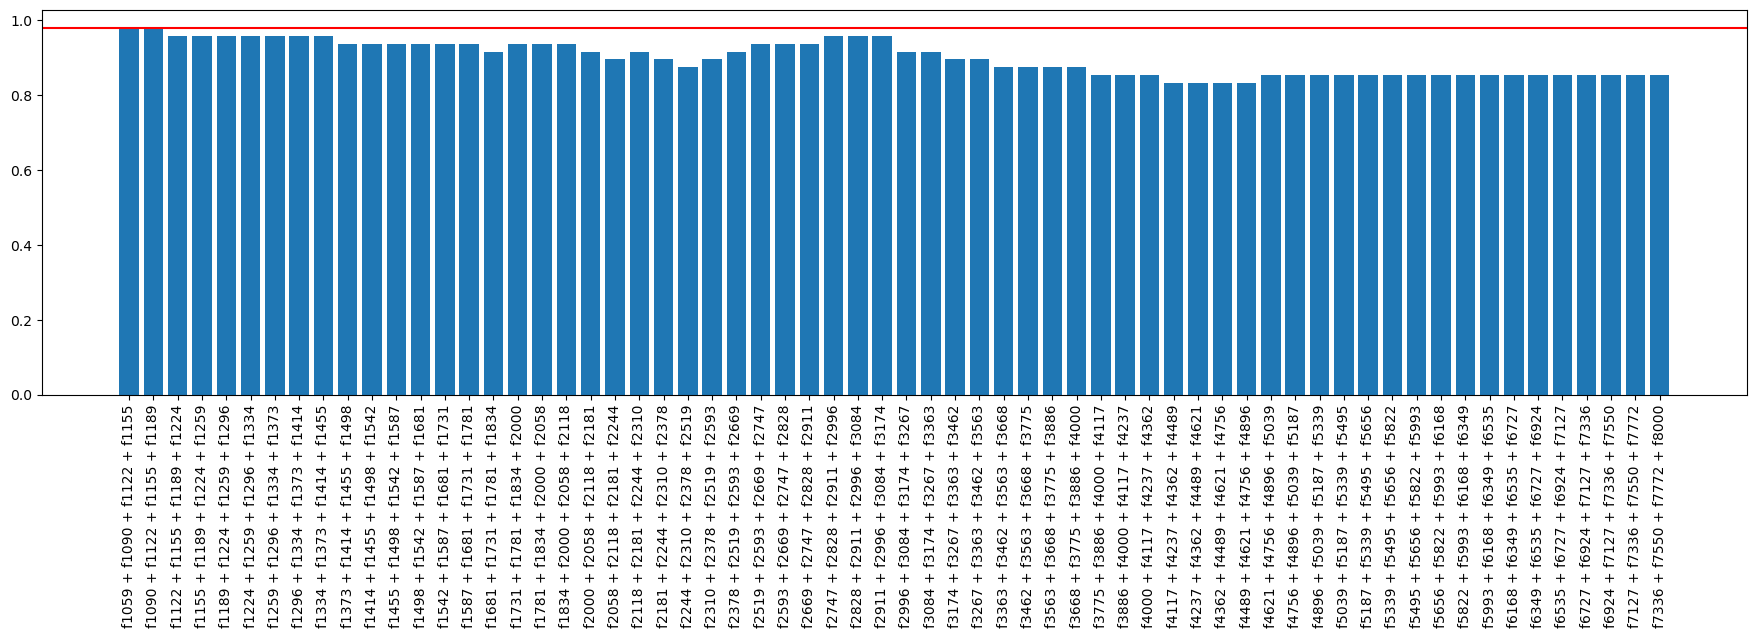

In [30]:
freq_fs_gs_mul = [x for x,y,z in fs_gs_mul_lr_score]
acc_fs_gs_mul = [y for x,y,z in fs_gs_mul_lr_score]
freq_fs_gs_mul = [' + '.join(x) for x in freq_fs_gs_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_fs_mul,acc_fs_mul)
plt.axhline(y=0.9791666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

### 3.1.2 SMOTE

In [87]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/02 - SMOTE/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

var_thr = VarianceThreshold(threshold = 0.025)
var_thr.fit(X_train)
dropVal = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]

X_train = X_train.drop(dropVal, axis=1)
X_test = X_test.drop(dropVal, axis=1)
X_val = X_val.drop(dropVal, axis=1)

#print(X_train)


In [32]:
fs_smote_mul_acc_score = []
fs_smote_mul_lr_score = [] 
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    fs_smote_mul_acc_score = accuracy_score(y_test, y_pred)
    fs_smote_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),fs_smote_mul_acc_score])
        
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
fs_smote_mul_lr_score.sort(key=lambda x:x[1])
fs_smote_mul_lr_score

[[['fa3668', 'fa3775', 'fa3886', 'fa4000'], 0.6041666666666666],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'], 0.625],
 [['fa3775', 'fa3886', 'fa4000', 'fa4117'], 0.625],
 [['fa4489', 'fa4621', 'fa4756', 'fa4896'], 0.625],
 [['fa4621', 'fa4756', 'fa4896', 'fa5039'], 0.625],
 [['fa5187', 'fa5339', 'fa5495', 'fa5656'], 0.625],
 [['fa5339', 'fa5495', 'fa5656', 'fa5822'], 0.625],
 [['fa2669', 'fa3563', 'fa3668', 'fa3775'], 0.6458333333333334],
 [['fa4000', 'fa4117', 'fa4237', 'fa4362'], 0.6458333333333334],
 [['fa5039', 'fa5187', 'fa5339', 'fa5495'], 0.6458333333333334],
 [['fa5495', 'fa5656', 'fa5822', 'fa5993'], 0.6458333333333334],
 [['fa4117', 'fa4237', 'fa4362', 'fa4489'], 0.6875],
 [['fa4362', 'fa4489', 'fa4621', 'fa4756'], 0.6875],
 [['fa4756', 'fa4896', 'fa5039', 'fa5187'], 0.6875],
 [['fa5993', 'fa6168', 'fa6349', 'fa6535'], 0.6875],
 [['fa3886', 'fa4000', 'fa4117', 'fa4237'], 0.7083333333333334],
 [['fa4237', 'fa4362', 'fa4489', 'fa4621'], 0.7083333333333334],
 [['fa4896', 'fa5039'

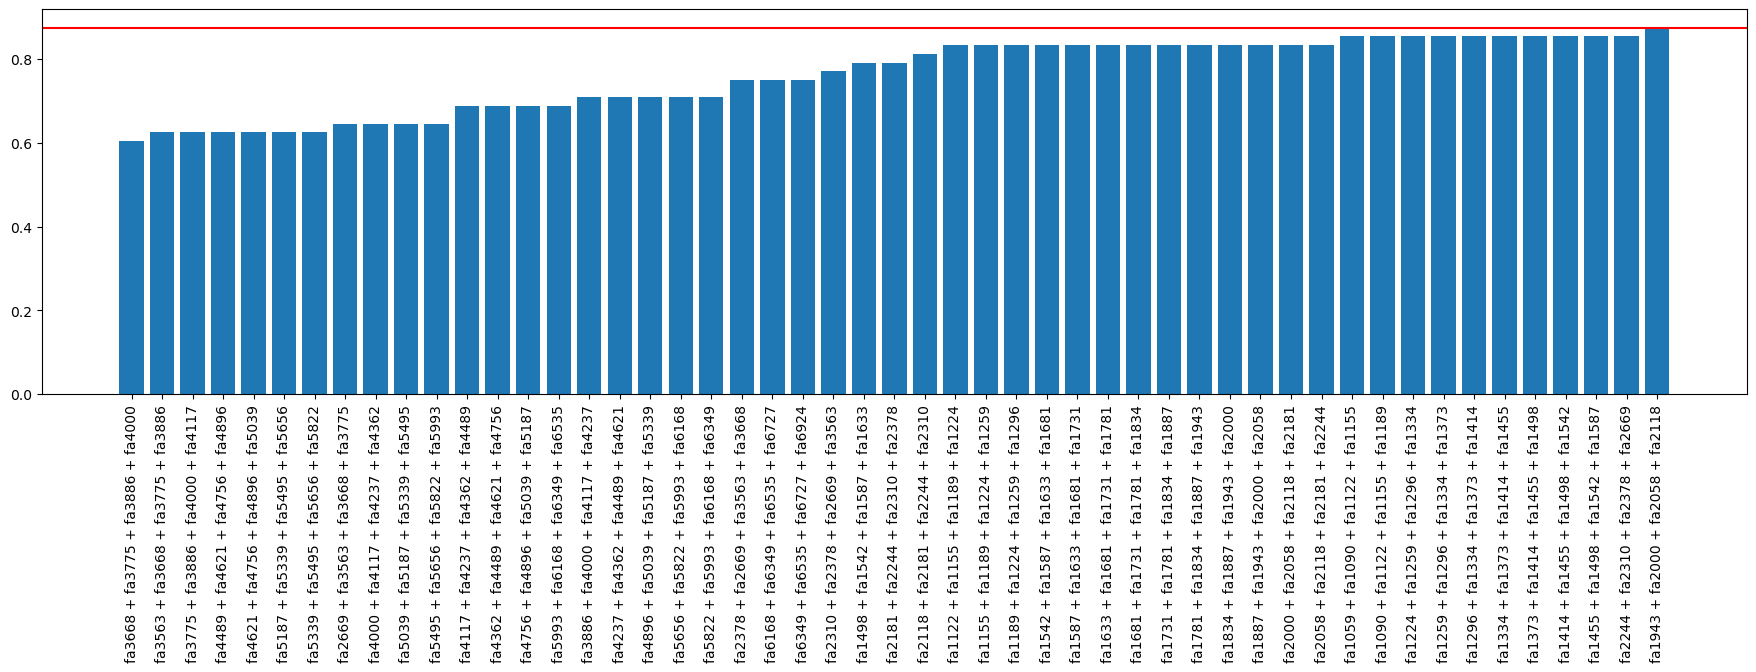

In [33]:
freq_fs_smote_mul = [x for x,y in fs_smote_mul_lr_score]
acc_fs_smote_mul = [y for x,y in fs_smote_mul_lr_score]
freq_fs_smote_mul = [' + '.join(x) for x in freq_fs_smote_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_fs_smote_mul,acc_fs_smote_mul)
plt.axhline(y=0.875, color ='r')
plt.xticks(rotation=90)
plt.show()

#### 3.1.2.1 GridSearch SMOTE

In [89]:
fs_gs_smote_mul_acc_score = []
fs_gs_smote_mul_lr_score = [] 
i = 1
rcl = []
while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    Xval = sc.transform(Xval)
    
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xval)
    rc = recall_score(y_val, y_pred, average='macro')
    rcl.append([list(X_train.iloc[:,i:i+4]), rc])
    #fs_gs_smote_mul_acc_score = accuracy_score(y_test, y_pred)
    #fs_gs_smote_mul_lr_score.append([list(X_train.iloc[:,i:i+4].columns),fs_gs_smote_mul_acc_score,grid_clf_acc.best_params_])
    
    
    i = i + 1
rcl
#fs_gs_smote_mul_lr_score.sort(key=lambda x:x[1])
#fs_gs_smote_mul_lr_score

[[['fa1059', 'fa1090', 'fa1122', 'fa1155'], 0.8611111111111112],
 [['fa1090', 'fa1122', 'fa1155', 'fa1189'], 0.8777777777777778],
 [['fa1122', 'fa1155', 'fa1189', 'fa1224'], 0.8777777777777778],
 [['fa1155', 'fa1189', 'fa1224', 'fa1259'], 0.8777777777777778],
 [['fa1189', 'fa1224', 'fa1259', 'fa1296'], 0.8611111111111112],
 [['fa1224', 'fa1259', 'fa1296', 'fa1334'], 0.8611111111111112],
 [['fa1259', 'fa1296', 'fa1334', 'fa1373'], 0.8777777777777778],
 [['fa1296', 'fa1334', 'fa1373', 'fa1414'], 0.8777777777777778],
 [['fa1334', 'fa1373', 'fa1414', 'fa1455'], 0.8777777777777778],
 [['fa1373', 'fa1414', 'fa1455', 'fa1498'], 0.8777777777777778],
 [['fa1414', 'fa1455', 'fa1498', 'fa1542'], 0.8777777777777778],
 [['fa1455', 'fa1498', 'fa1542', 'fa1587'], 0.8777777777777778],
 [['fa1498', 'fa1542', 'fa1587', 'fa1633'], 0.8944444444444444],
 [['fa1542', 'fa1587', 'fa1633', 'fa1681'], 0.8222222222222222],
 [['fa1587', 'fa1633', 'fa1681', 'fa1731'], 0.8222222222222222],
 [['fa1633', 'fa1681', 'f

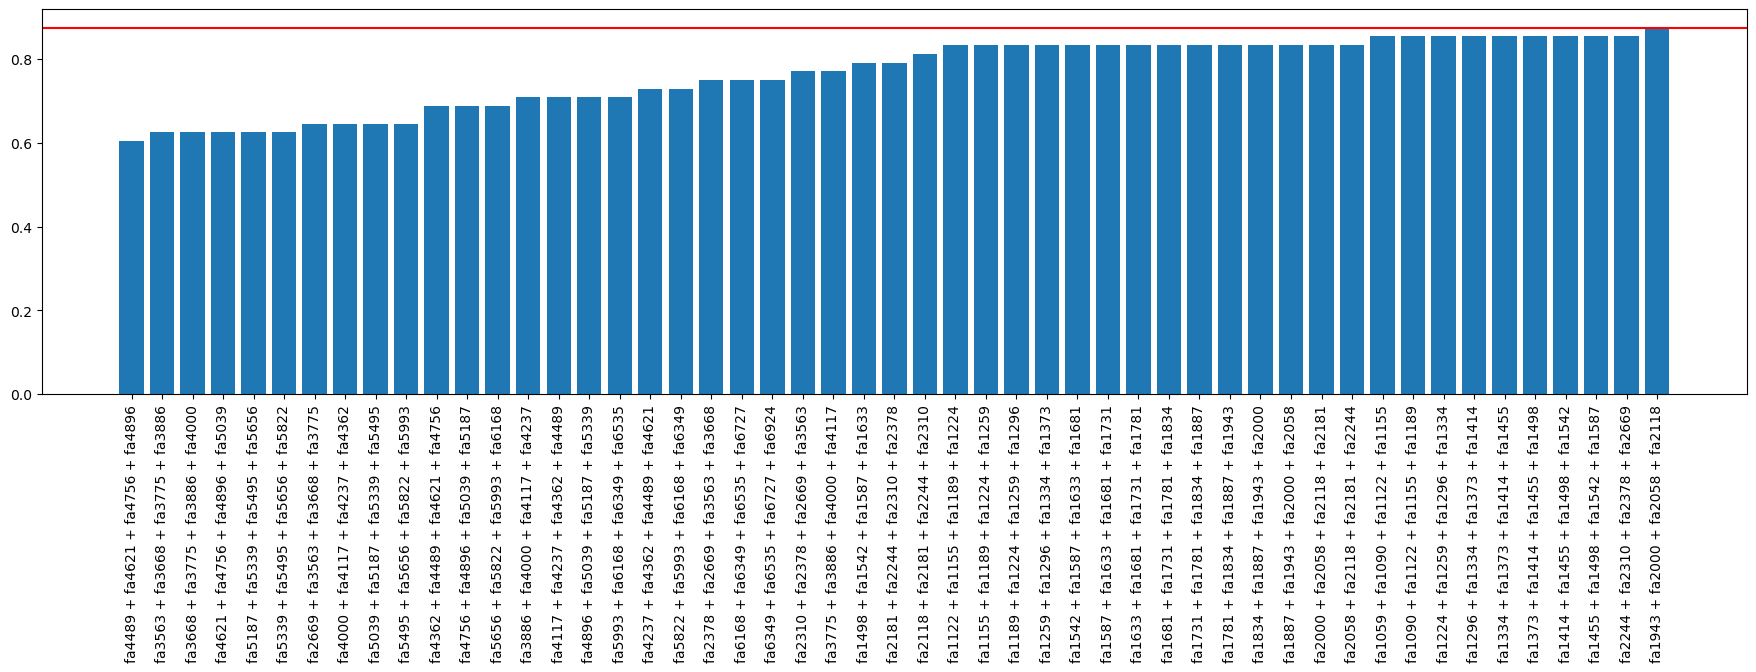

In [35]:
freq_fs_gs_smote_mul = [x for x,y,z in fs_gs_smote_mul_lr_score]
acc_fs_gs_smote_mul = [y for x,y,z in fs_gs_smote_mul_lr_score]
freq_fs_gs_smote_mul = [' + '.join(x) for x in freq_fs_gs_smote_mul]

plt.figure(figsize=(22,5))
plt.bar(freq_fs_gs_smote_mul,acc_fs_gs_smote_mul)
plt.axhline(y=0.875, color ='r')
plt.xticks(rotation=90)
plt.show()

### 3.1.3 SMOTETomek

In [90]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/04 - SMOTETomek/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

var_thr = VarianceThreshold(threshold = 0.025)
var_thr.fit(X_train)

dropVal = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]

X_train = X_train.drop(dropVal, axis=1)
X_test = X_test.drop(dropVal, axis=1)
X_val = X_val.drop(dropVal, axis=1)

In [37]:
fs_smotetom_mul_acc_score = []
fs_smotetom_mul_lr_score = [] 
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    fs_smotetom_mul_acc_score = accuracy_score(y_test, y_pred)
    fs_smotetom_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),fs_smotetom_mul_acc_score])
        
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
fs_smotetom_mul_lr_score.sort(key=lambda x:x[1])
fs_smotetom_mul_lr_score

[[['fa4489', 'fa4621', 'fa4756', 'fa4896'], 0.5833333333333334],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'], 0.625],
 [['fa3668', 'fa3775', 'fa3886', 'fa4000'], 0.625],
 [['fa3775', 'fa3886', 'fa4000', 'fa4117'], 0.625],
 [['fa4621', 'fa4756', 'fa4896', 'fa5039'], 0.625],
 [['fa5187', 'fa5339', 'fa5495', 'fa5656'], 0.625],
 [['fa5339', 'fa5495', 'fa5656', 'fa5822'], 0.625],
 [['fa2669', 'fa3563', 'fa3668', 'fa3775'], 0.6458333333333334],
 [['fa4000', 'fa4117', 'fa4237', 'fa4362'], 0.6458333333333334],
 [['fa5039', 'fa5187', 'fa5339', 'fa5495'], 0.6458333333333334],
 [['fa5495', 'fa5656', 'fa5822', 'fa5993'], 0.6458333333333334],
 [['fa4117', 'fa4237', 'fa4362', 'fa4489'], 0.6875],
 [['fa4362', 'fa4489', 'fa4621', 'fa4756'], 0.6875],
 [['fa4756', 'fa4896', 'fa5039', 'fa5187'], 0.6875],
 [['fa4896', 'fa5039', 'fa5187', 'fa5339'], 0.6875],
 [['fa5822', 'fa5993', 'fa6168', 'fa6349'], 0.6875],
 [['fa5993', 'fa6168', 'fa6349', 'fa6535'], 0.6875],
 [['fa3886', 'fa4000', 'fa4117', 'fa4237'], 0

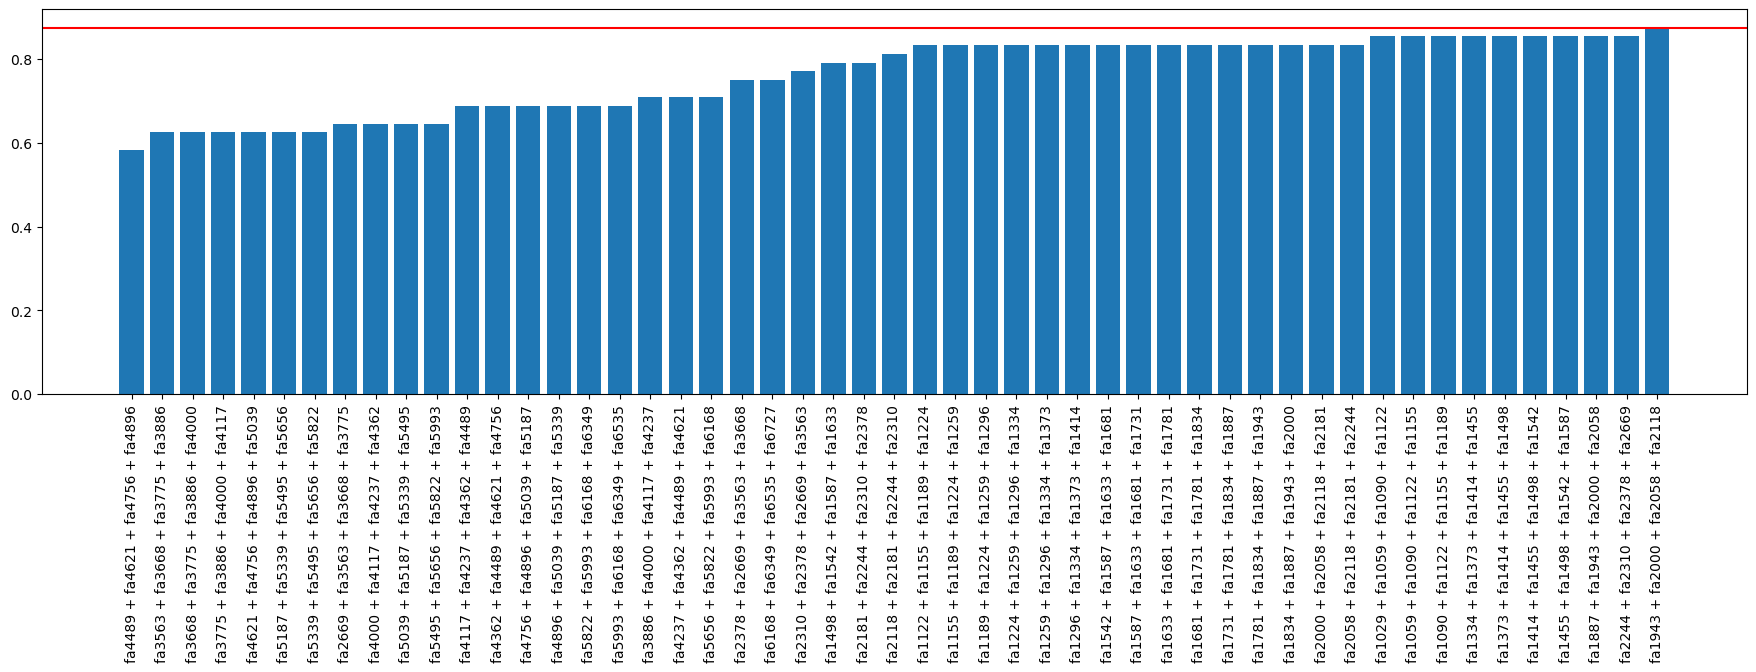

In [38]:
freq_fs_smotetom_mul = [x for x,y in fs_smotetom_mul_lr_score]
acc_fs_smotetom_mul = [y for x,y in fs_smotetom_mul_lr_score]
freq_fs_smotetom_mul = [' + '.join(x) for x in freq_fs_smotetom_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_fs_smotetom_mul,acc_fs_smotetom_mul)
plt.axhline(y=0.875, color ='r')
plt.xticks(rotation=90)
plt.show()

#### 3.1.3.1 GridSearch SMOTETomek

In [92]:
fs_gs_smotetom_mul_acc_score = []
fs_gs_smotetom_mul_lr_score = [] 
i = 1
rcl = []
while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    Xval = sc.transform(Xval)
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xval)
    rc = recall_score(y_val, y_pred, average='macro')
    rcl.append([list(X_train.iloc[:,i:i+4]), rc])
    #fs_gs_smotetom_mul_acc_score = accuracy_score(y_test, y_pred)
    #fs_gs_smotetom_mul_lr_score.append([list(X_train.iloc[:,i:i+4].columns),fs_gs_smotetom_mul_acc_score,grid_clf_acc.best_params_])
    
    
    i = i + 1
rcl
#fs_gs_smote_mul_lr_score.sort(key=lambda x:x[1])
#fs_gs_smotetom_mul_lr_score

[[['fa1029', 'fa1059', 'fa1090', 'fa1122'], 0.8611111111111112],
 [['fa1059', 'fa1090', 'fa1122', 'fa1155'], 0.8611111111111112],
 [['fa1090', 'fa1122', 'fa1155', 'fa1189'], 0.8777777777777778],
 [['fa1122', 'fa1155', 'fa1189', 'fa1224'], 0.8777777777777778],
 [['fa1155', 'fa1189', 'fa1224', 'fa1259'], 0.8777777777777778],
 [['fa1189', 'fa1224', 'fa1259', 'fa1296'], 0.8611111111111112],
 [['fa1224', 'fa1259', 'fa1296', 'fa1334'], 0.8611111111111112],
 [['fa1259', 'fa1296', 'fa1334', 'fa1373'], 0.8777777777777778],
 [['fa1296', 'fa1334', 'fa1373', 'fa1414'], 0.8777777777777778],
 [['fa1334', 'fa1373', 'fa1414', 'fa1455'], 0.8777777777777778],
 [['fa1373', 'fa1414', 'fa1455', 'fa1498'], 0.8777777777777778],
 [['fa1414', 'fa1455', 'fa1498', 'fa1542'], 0.8777777777777778],
 [['fa1455', 'fa1498', 'fa1542', 'fa1587'], 0.8777777777777778],
 [['fa1498', 'fa1542', 'fa1587', 'fa1633'], 0.8944444444444444],
 [['fa1542', 'fa1587', 'fa1633', 'fa1681'], 0.8388888888888889],
 [['fa1587', 'fa1633', 'f

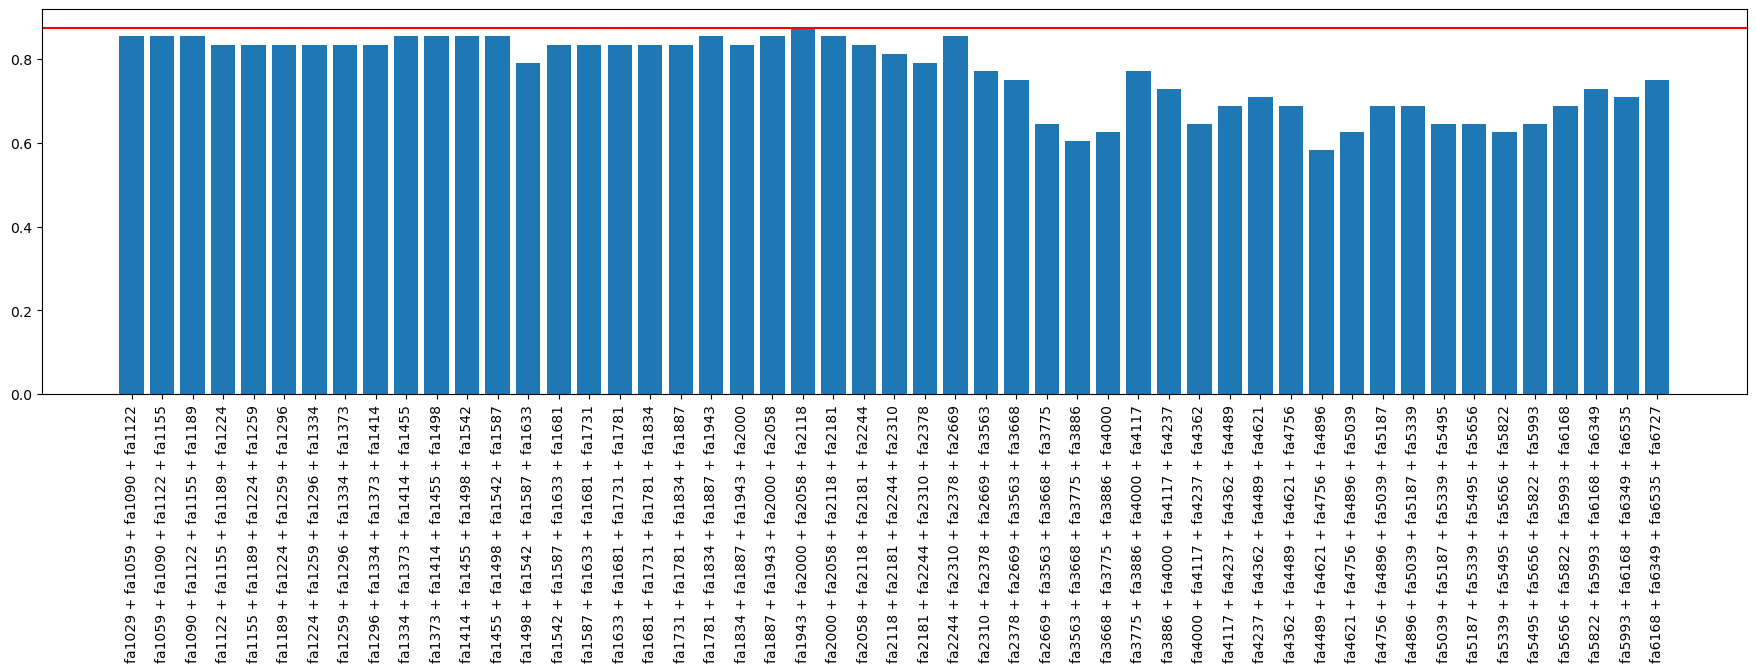

In [40]:
freq_fs_gs_smotetom_mul = [x for x,y,z in fs_gs_smotetom_mul_lr_score]
acc_fs_gs_smotetom_mul = [y for x,y,z in fs_gs_smotetom_mul_lr_score]
freq_fs_gs_smotetom_mul = [' + '.join(x) for x in freq_fs_gs_smotetom_mul]

plt.figure(figsize=(22,5))
plt.bar(freq_fs_gs_smotetom_mul,acc_fs_gs_smotetom_mul)
plt.axhline(y=0.875, color ='r')
plt.xticks(rotation=90)
plt.show()

### 3.1.4 SMOTEENN

In [94]:
X_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_train.csv')
X_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_test.csv')
X_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/X_val.csv')

y_train = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_train.csv')
y_test = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_test.csv')
y_val = pd.read_csv('00 - Dataset/03 - Sampling Splits/03 - SMOTEENN/y_val.csv')

X_train = X_train.filter(regex = 'fa')
X_test = X_test.filter(regex = 'fa')
X_val = X_val.filter(regex = 'fa')

var_thr = VarianceThreshold(threshold = 0.025)
var_thr.fit(X_train)

dropVal = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]

X_train = X_train.drop(dropVal, axis=1)
X_test = X_test.drop(dropVal, axis=1)
X_val = X_val.drop(dropVal, axis=1)

In [42]:
fs_smoteenn_mul_acc_score = []
fs_smoteenn_mul_lr_score = [] 
i = 1

while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    #print(Xtr)
    #X_train, X_test, y_train, y_test = train_test_split(freq, y, test_size=0.2, random_state=12)

    #Ridge
    #model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    model.fit(Xtr, y_train)

    score = model.score(Xte, y_test)
    y_pred = model.predict(Xte)
    fs_smoteenn_mul_acc_score = accuracy_score(y_test, y_pred)
    fs_smoteenn_mul_lr_score.append([list(X_train.iloc[:,i:i+4]),fs_smoteenn_mul_acc_score])
        
    i = i + 1
    #print(list(freq.columns),'\n', classification_report(y_test, y_pred))
fs_smoteenn_mul_lr_score.sort(key=lambda x:x[1])
fs_smoteenn_mul_lr_score

[[['fa4489', 'fa4621', 'fa4756', 'fa4896'], 0.5],
 [['fa4237', 'fa4362', 'fa4489', 'fa4621'], 0.5208333333333334],
 [['fa2911', 'fa3462', 'fa3563', 'fa3668'], 0.5625],
 [['fa3462', 'fa3563', 'fa3668', 'fa3775'], 0.5625],
 [['fa3563', 'fa3668', 'fa3775', 'fa3886'], 0.5625],
 [['fa3668', 'fa3775', 'fa3886', 'fa4000'], 0.5625],
 [['fa4117', 'fa4237', 'fa4362', 'fa4489'], 0.5625],
 [['fa4362', 'fa4489', 'fa4621', 'fa4756'], 0.5625],
 [['fa3775', 'fa3886', 'fa4000', 'fa4117'], 0.5833333333333334],
 [['fa3886', 'fa4000', 'fa4117', 'fa4237'], 0.5833333333333334],
 [['fa4621', 'fa4756', 'fa4896', 'fa5039'], 0.5833333333333334],
 [['fa4000', 'fa4117', 'fa4237', 'fa4362'], 0.6041666666666666],
 [['fa5039', 'fa5187', 'fa5339', 'fa5495'], 0.6041666666666666],
 [['fa5187', 'fa5339', 'fa5495', 'fa5656'], 0.6041666666666666],
 [['fa5339', 'fa5495', 'fa5656', 'fa5822'], 0.6041666666666666],
 [['fa2669', 'fa2747', 'fa2911', 'fa3462'], 0.625],
 [['fa5495', 'fa5656', 'fa5822', 'fa5993'], 0.625],
 [['fa27

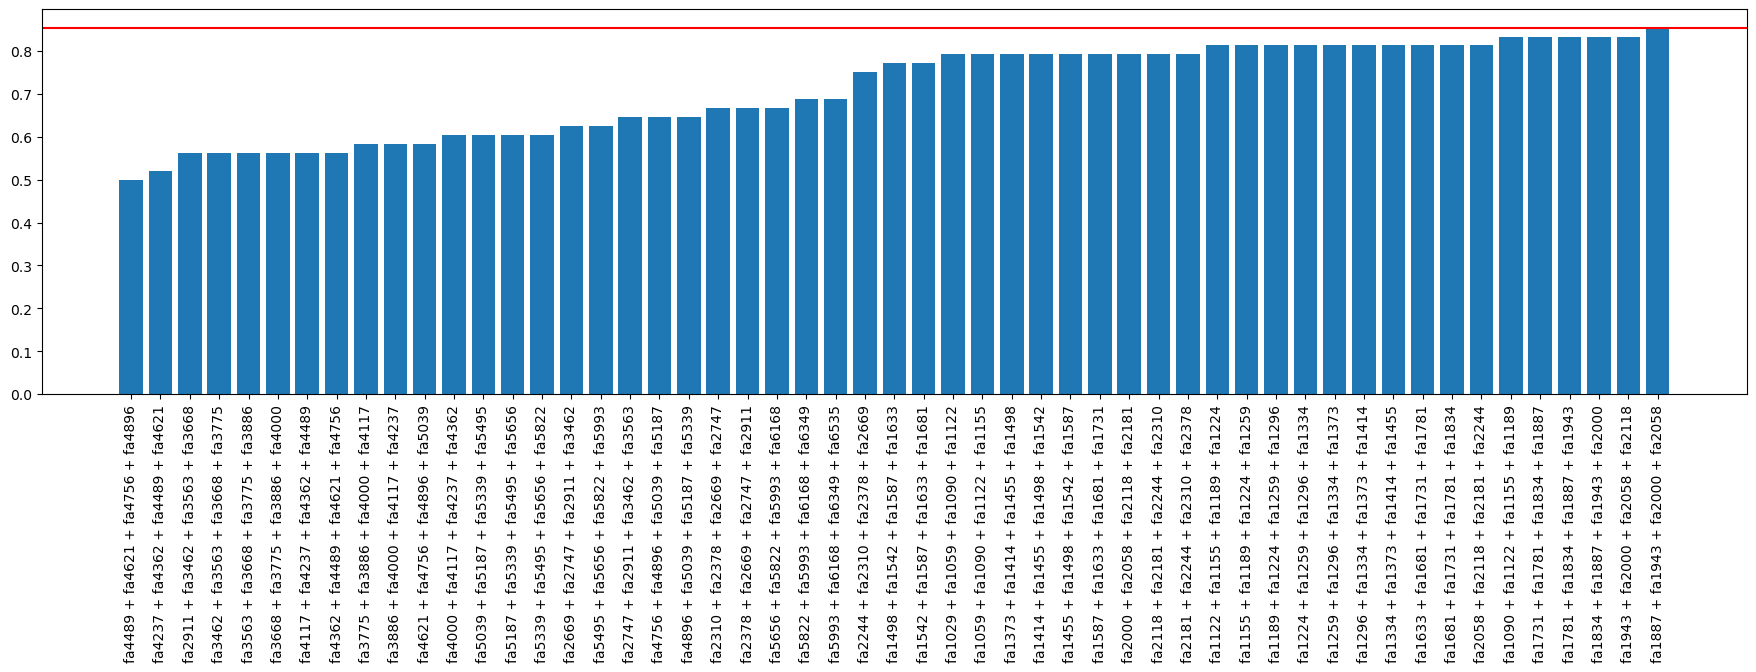

In [43]:
freq_fs_smoteenn_mul = [x for x,y in fs_smoteenn_mul_lr_score]
acc_fs_smoteenn_mul = [y for x,y in fs_smoteenn_mul_lr_score]
freq_fs_smoteenn_mul = [' + '.join(x) for x in freq_fs_smoteenn_mul]

#print(freqmul)

plt.figure(figsize=(22,5))
plt.bar(freq_fs_smoteenn_mul,acc_fs_smoteenn_mul)
plt.axhline(y=0.8541666666666666, color ='r')
plt.xticks(rotation=90)
plt.show()

#### 3.1.4.1 GridSearch SMOTEENN

In [97]:
fs_gs_smoteenn_mul_acc_score = []
fs_gs_smoteenn_mul_lr_score = [] 
i = 1
rcl = []
while i < len(X_train.columns):
    if(i+4 > len(X_train.columns)):
        break
    Xtr= X_train.iloc[:,i:i+4] #4 columns at a time
    Xte = X_test.iloc[:,i:i+4]
    Xval = X_val.iloc[:,i:i+4]
    
    sc = StandardScaler()
    Xtr = sc.fit_transform(Xtr)
    Xte = sc.transform(Xte)
    Xval = sc.transform(Xval)
    clf = LogisticRegression()
    
    grid_values = {'penalty': ['elasticnet'],'solver':['saga'], 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[5000]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring= 'recall')
    grid_clf_acc.fit(Xtr, y_train)
    
    #score = model.score(X_test, y_test)
    y_pred = grid_clf_acc.predict(Xval)
    rc = recall_score(y_val, y_pred, average='macro')
    rcl.append([list(X_train.iloc[:,i:i+4]), rc])
    #fs_gs_smoteenn_mul_acc_score = accuracy_score(y_test, y_pred)
    #fs_gs_smoteenn_mul_lr_score.append([list(X_train.iloc[:,i:i+4].columns),fs_gs_smoteenn_mul_acc_score,grid_clf_acc.best_params_])
    
    
    i = i + 1
rcl
#fs_gs_smoteenn_mul_lr_score.sort(key=lambda x:x[1])
#fs_gs_smoteenn_mul_lr_score

[[['fa1029', 'fa1059', 'fa1090', 'fa1122'], 0.8611111111111112],
 [['fa1059', 'fa1090', 'fa1122', 'fa1155'], 0.8611111111111112],
 [['fa1090', 'fa1122', 'fa1155', 'fa1189'], 0.8777777777777778],
 [['fa1122', 'fa1155', 'fa1189', 'fa1224'], 0.8611111111111112],
 [['fa1155', 'fa1189', 'fa1224', 'fa1259'], 0.8611111111111112],
 [['fa1189', 'fa1224', 'fa1259', 'fa1296'], 0.8444444444444444],
 [['fa1224', 'fa1259', 'fa1296', 'fa1334'], 0.8444444444444444],
 [['fa1259', 'fa1296', 'fa1334', 'fa1373'], 0.8444444444444444],
 [['fa1296', 'fa1334', 'fa1373', 'fa1414'], 0.8611111111111112],
 [['fa1334', 'fa1373', 'fa1414', 'fa1455'], 0.8611111111111112],
 [['fa1373', 'fa1414', 'fa1455', 'fa1498'], 0.8611111111111112],
 [['fa1414', 'fa1455', 'fa1498', 'fa1542'], 0.8777777777777778],
 [['fa1455', 'fa1498', 'fa1542', 'fa1587'], 0.8777777777777778],
 [['fa1498', 'fa1542', 'fa1587', 'fa1633'], 0.8777777777777778],
 [['fa1542', 'fa1587', 'fa1633', 'fa1681'], 0.8222222222222222],
 [['fa1587', 'fa1633', 'f

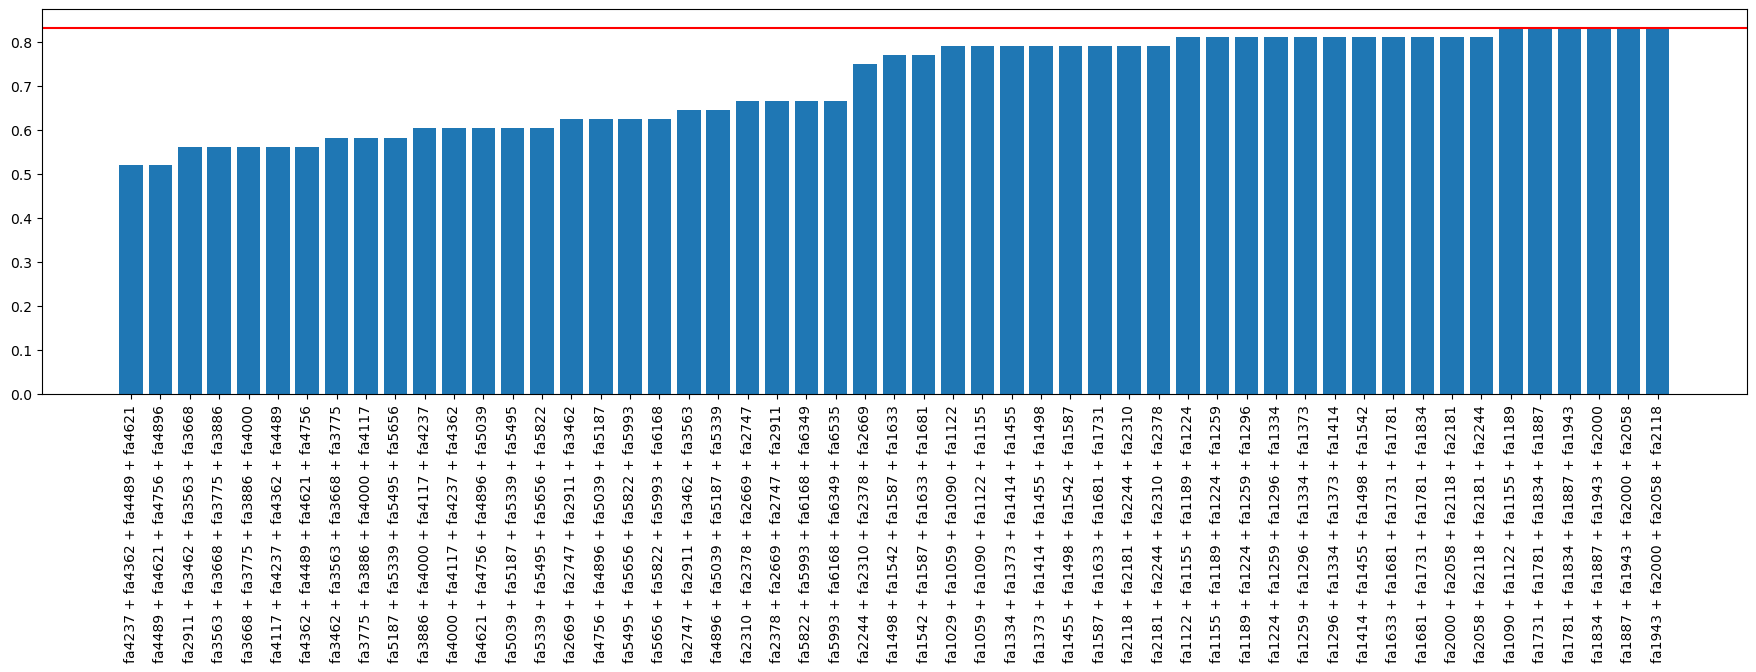

In [45]:
freq_fs_gs_smoteenn_mul = [x for x,y,z in fs_gs_smoteenn_mul_lr_score]
acc_fs_gs_smoteenn_mul = [y for x,y,z in fs_gs_smoteenn_mul_lr_score]
freq_fs_gs_smoteenn_mul = [' + '.join(x) for x in freq_fs_gs_smoteenn_mul]

plt.figure(figsize=(22,5))
plt.bar(freq_fs_gs_smoteenn_mul,acc_fs_gs_smoteenn_mul)
plt.axhline(y=0.8333333333333334, color ='r')
plt.xticks(rotation=90)
plt.show()